# How The Number of Hours Worked Differs Based on a Person's Marital Status, Education and Workclass

Siddharth Nand    
Charul Maheshka    
Winston ONG    
Simon Liang    

<hr style="opacity: 0.3" />

## Introduction

We are interested in the factors that impact number of hours worked per week. Our question is: **Does level of education, marital status, or their workclass (self-employment, government, or private enterprise, etc.) impact number of hours worked per week?** We will be answering this question by looking at the mean and standard deviation of hours worked per week and how it differs based on these categorical variables?

Past research has shown that long working hours can actually lead to changes in marital status: Working more than 60 hours a week leads to a higher risk of divorce or separation in females in Korea (Kim et al, 2019; Kim, Lee and Lee, 2021). However, this research is often limited by focusing on a specific country, preventing results from being generalizable more broadly. There is also a lack of research studying a bigger ranger of variables that can impact hours worked per week. 

To answer this question, we have chosen a dataset known as the “Adult” or “Census Income” dataset from the 1994 Census database, that includes data from 48,842 people from different countries on the measures that we are interested in: type of work, level of education, marital status and hours per week.

## Preliminary Results

In [1]:
library(tidyverse)
library(readxl)
library(infer)
library(moderndive)
library(repr)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Load Data

In [6]:
download.file("https://github.com/SimonYYL/STAT-201-Group-project/raw/main/adult.xlsx","adult.xlsx")
raw <- read_xlsx("adult.xlsx")

head(raw)

age,work_class,id,education,marital_status,occupation,relationship,ethnicity,sex,capital-gain,capital-loss,hours_per_week,country,income_group
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
56,Private,169133,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,Yugoslavia,<=50K
25,Private,191230,Some-college,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,Yugoslavia,<=50K
20,Private,175069,Some-college,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,Yugoslavia,<=50K
35,Private,164526,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,>50K
40,Local-gov,183096,9th,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Yugoslavia,>50K
31,Private,182177,Bachelors,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Yugoslavia,<=50K


### Clean and Wrangle Data

**1. Select the relevent columns for our question**

In [7]:
data <- raw %>%
    select(work_class, education, marital_status, hours_per_week)

head(data)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,9th,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


**2. Regroup** (See Appendix A)

In [8]:
data$education[data$education == "10th" |
          data$education == "11th" |
          data$education == "12th" |
          data$education == "1st-4th" |
          data$education == "5th-6th" |
          data$education == "7th-8th" |
          data$education == "9th" |
          data$education == "Preschool"] = "Less-than-HS"

**Final Dataframe**

In [9]:
head(data)

work_class,education,marital_status,hours_per_week
<chr>,<chr>,<chr>,<dbl>
Private,HS-grad,Married-civ-spouse,50
Private,Some-college,Never-married,40
Private,Some-college,Never-married,40
Private,HS-grad,Married-civ-spouse,40
Local-gov,Less-than-HS,Married-civ-spouse,40
Private,Bachelors,Married-civ-spouse,40


### Broad Overview of Data

This section has relevent plots that will allow us address our question more effectively

In [10]:
# ---------- Configerations for our plots ------------------

options(repr.plot.width = 20, repr.plot.height = 8)

plot_config <- theme_classic() +
                theme(plot.title = element_text(hjust = 0.5),
                      legend.position="none",
                      panel.spacing = unit(0.1, "lines"),
                      strip.text.x = element_text(size = 8),
                      panel.spacing.x = unit(0.75, "cm"),
                      text = element_text(size = 20))
                      
boxplot_scale <- scale_y_continuous(breaks = seq(0, 100, 10))

workclass_labels <- scale_x_discrete(labels = c("Unknown", "Federal Gov.", "Local Gov.",
                                "Never Worked", "Private", "Self Employed \n(Corporation)", "Self Employed",
                                "State Government", "Without Pay"))
                                
education_labels <- scale_x_discrete(labels = c("Associates", "Associates \nVocational School", "Bachelors",
                                "Doctorate", "Highschool \nGraduate", "Not Highschool \nGraduate",
                                "Masters", "Professional \nSchool", "Some College"))
                                
marital_status_labels <- scale_x_discrete(labels = c("Divorced", "Married Spouse \nIn Armed Forces", "Married",
                                                     "Married Spouse \nAbsent",
                                                     "Never Married", "Seperated", "Widowed"))

In [11]:
hrs_per_week_all <- data %>% ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 5) +
    xlab("Hours Per Week") +
    ylab("Count") +
    ggtitle("Frequency Disribution of Hours per Week Worked for Everyone") +
    plot_config +
    scale_y_continuous(breaks = seq(0, 30000, 2000)) +
    scale_x_continuous(breaks = seq(0, 110, 10))

hrs_per_week_workclass <- data %>%
    ggplot(aes(x = work_class, y = hours_per_week, color = work_class)) +
    geom_boxplot() +
    xlab("Workclass") +
    ylab("Hours per Week") +
    ggtitle("Hours per Week Worked Based on Workclass") +
    plot_config +
    boxplot_scale +
    workclass_labels

hrs_per_week_education <- data %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale +
    education_labels

hrs_per_week_marital_status <- data %>%
    ggplot(aes(x = marital_status, y = hours_per_week, color = marital_status)) +
    geom_boxplot() +
    xlab("Marital Status") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Marital Status") +
    plot_config +
    boxplot_scale +
    marital_status_labels

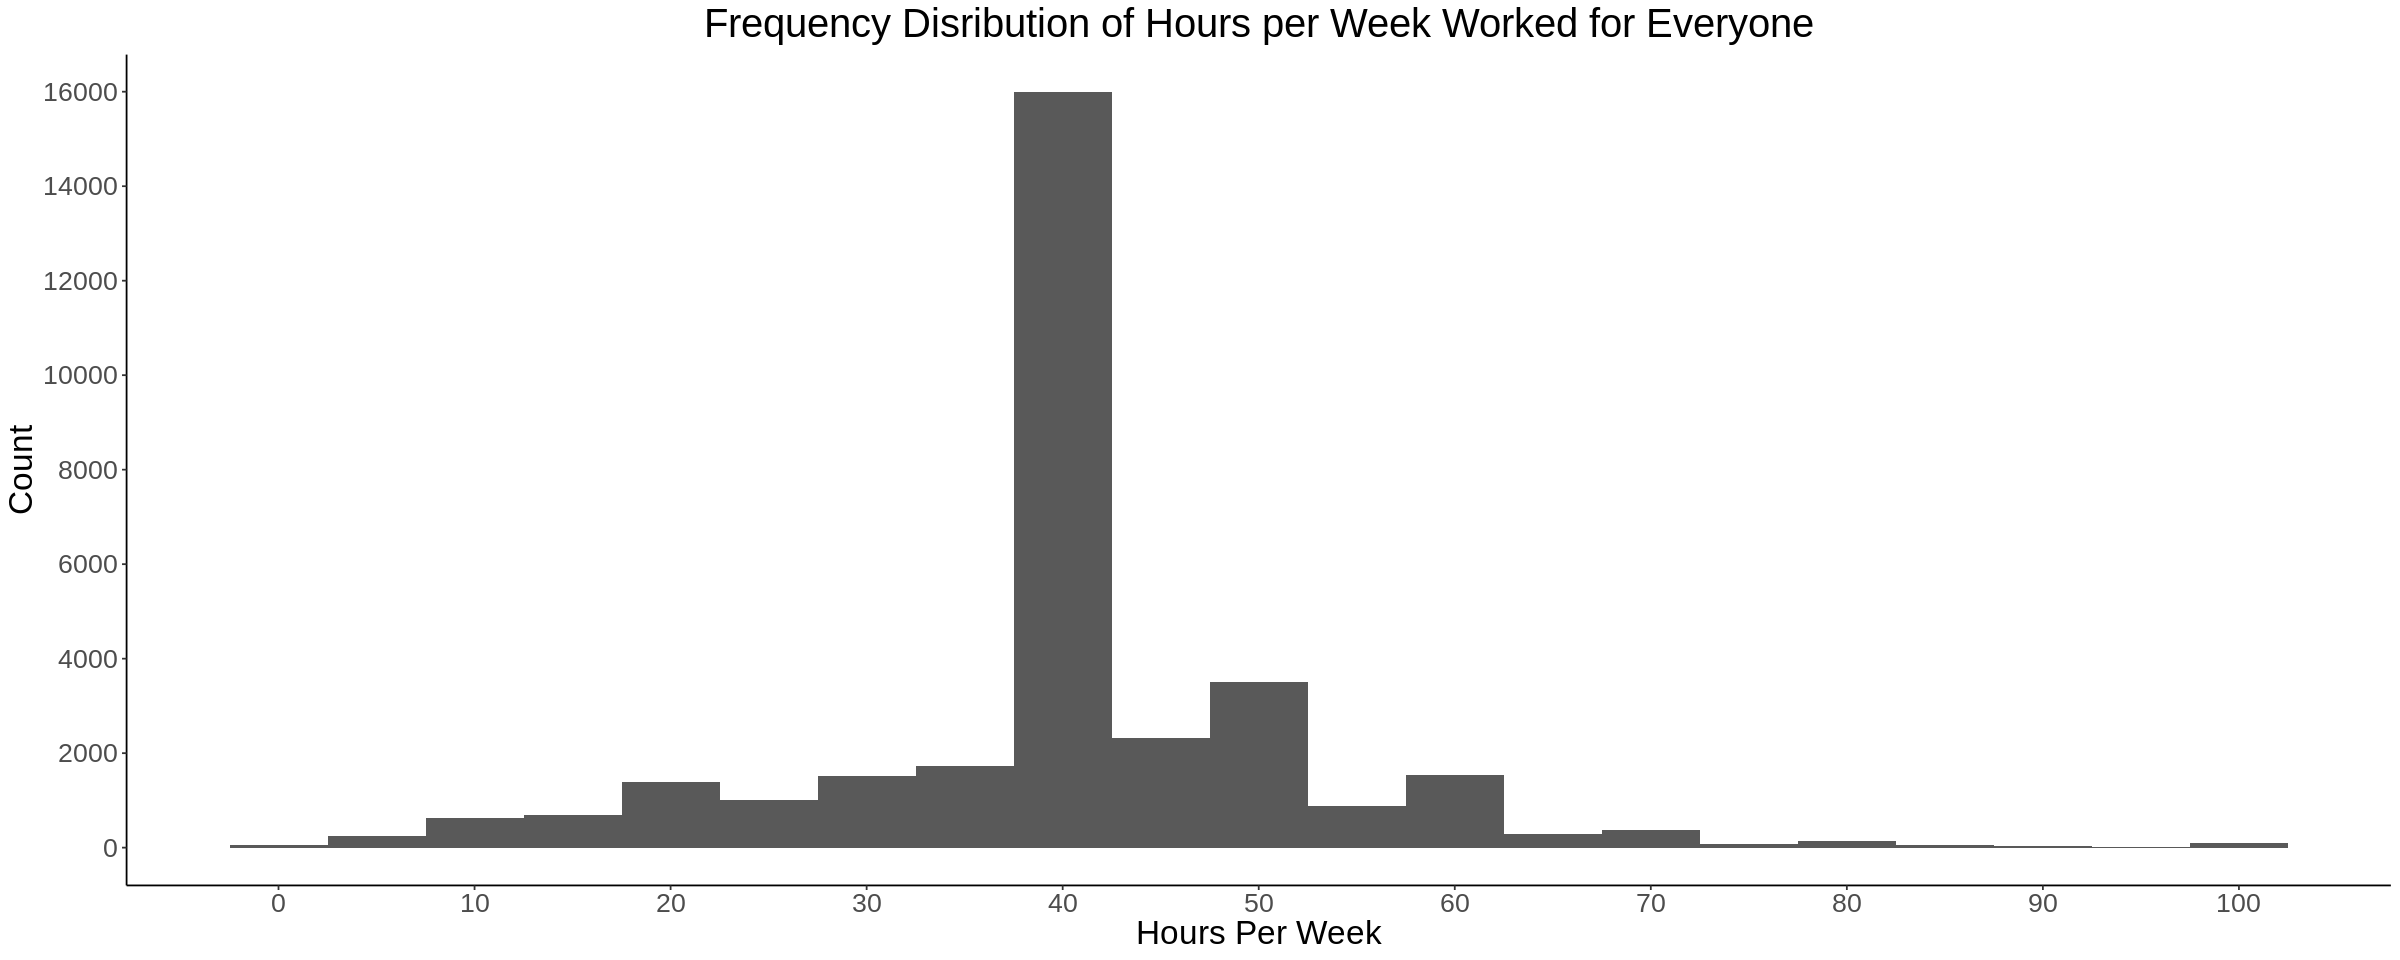

In [12]:
hrs_per_week_all

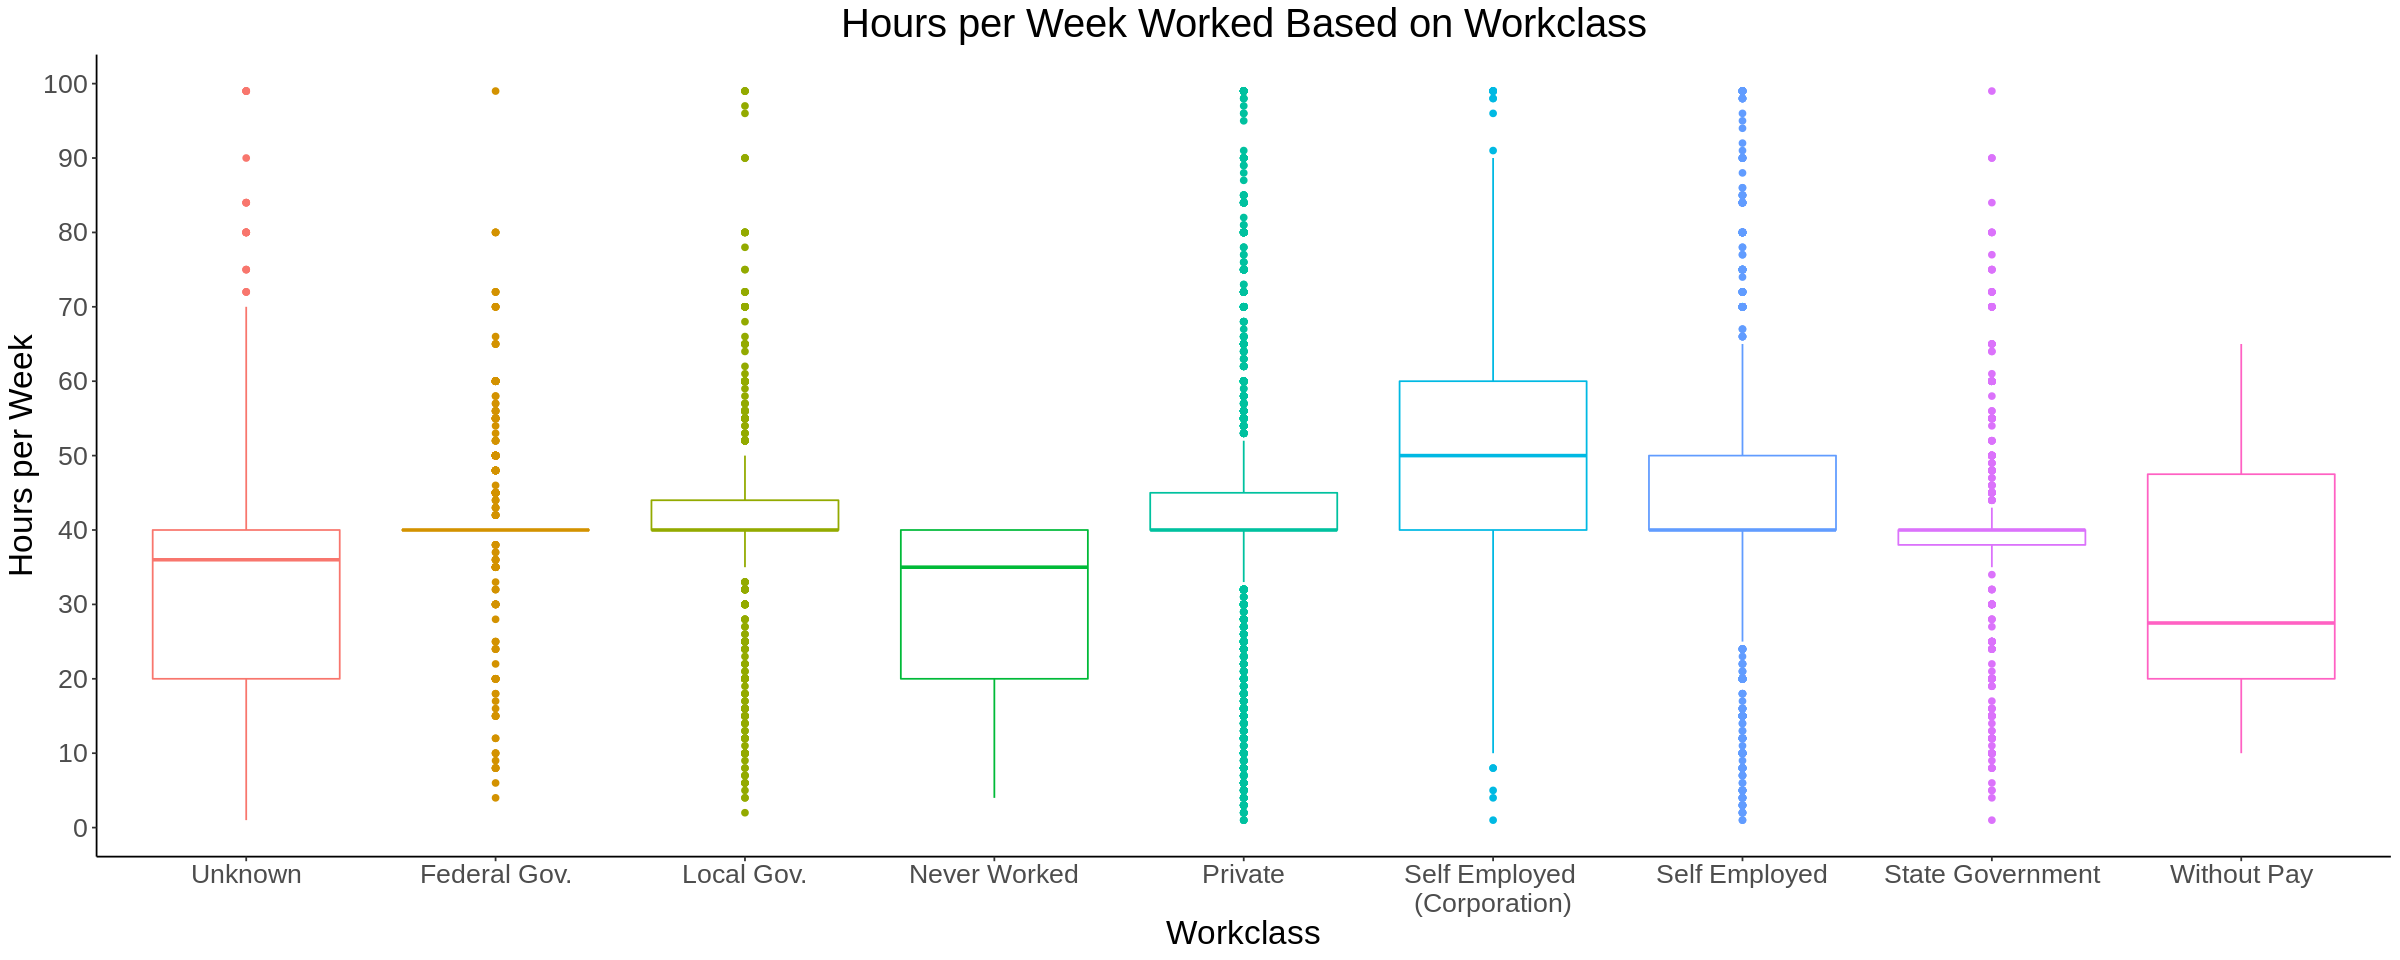

In [13]:
hrs_per_week_workclass

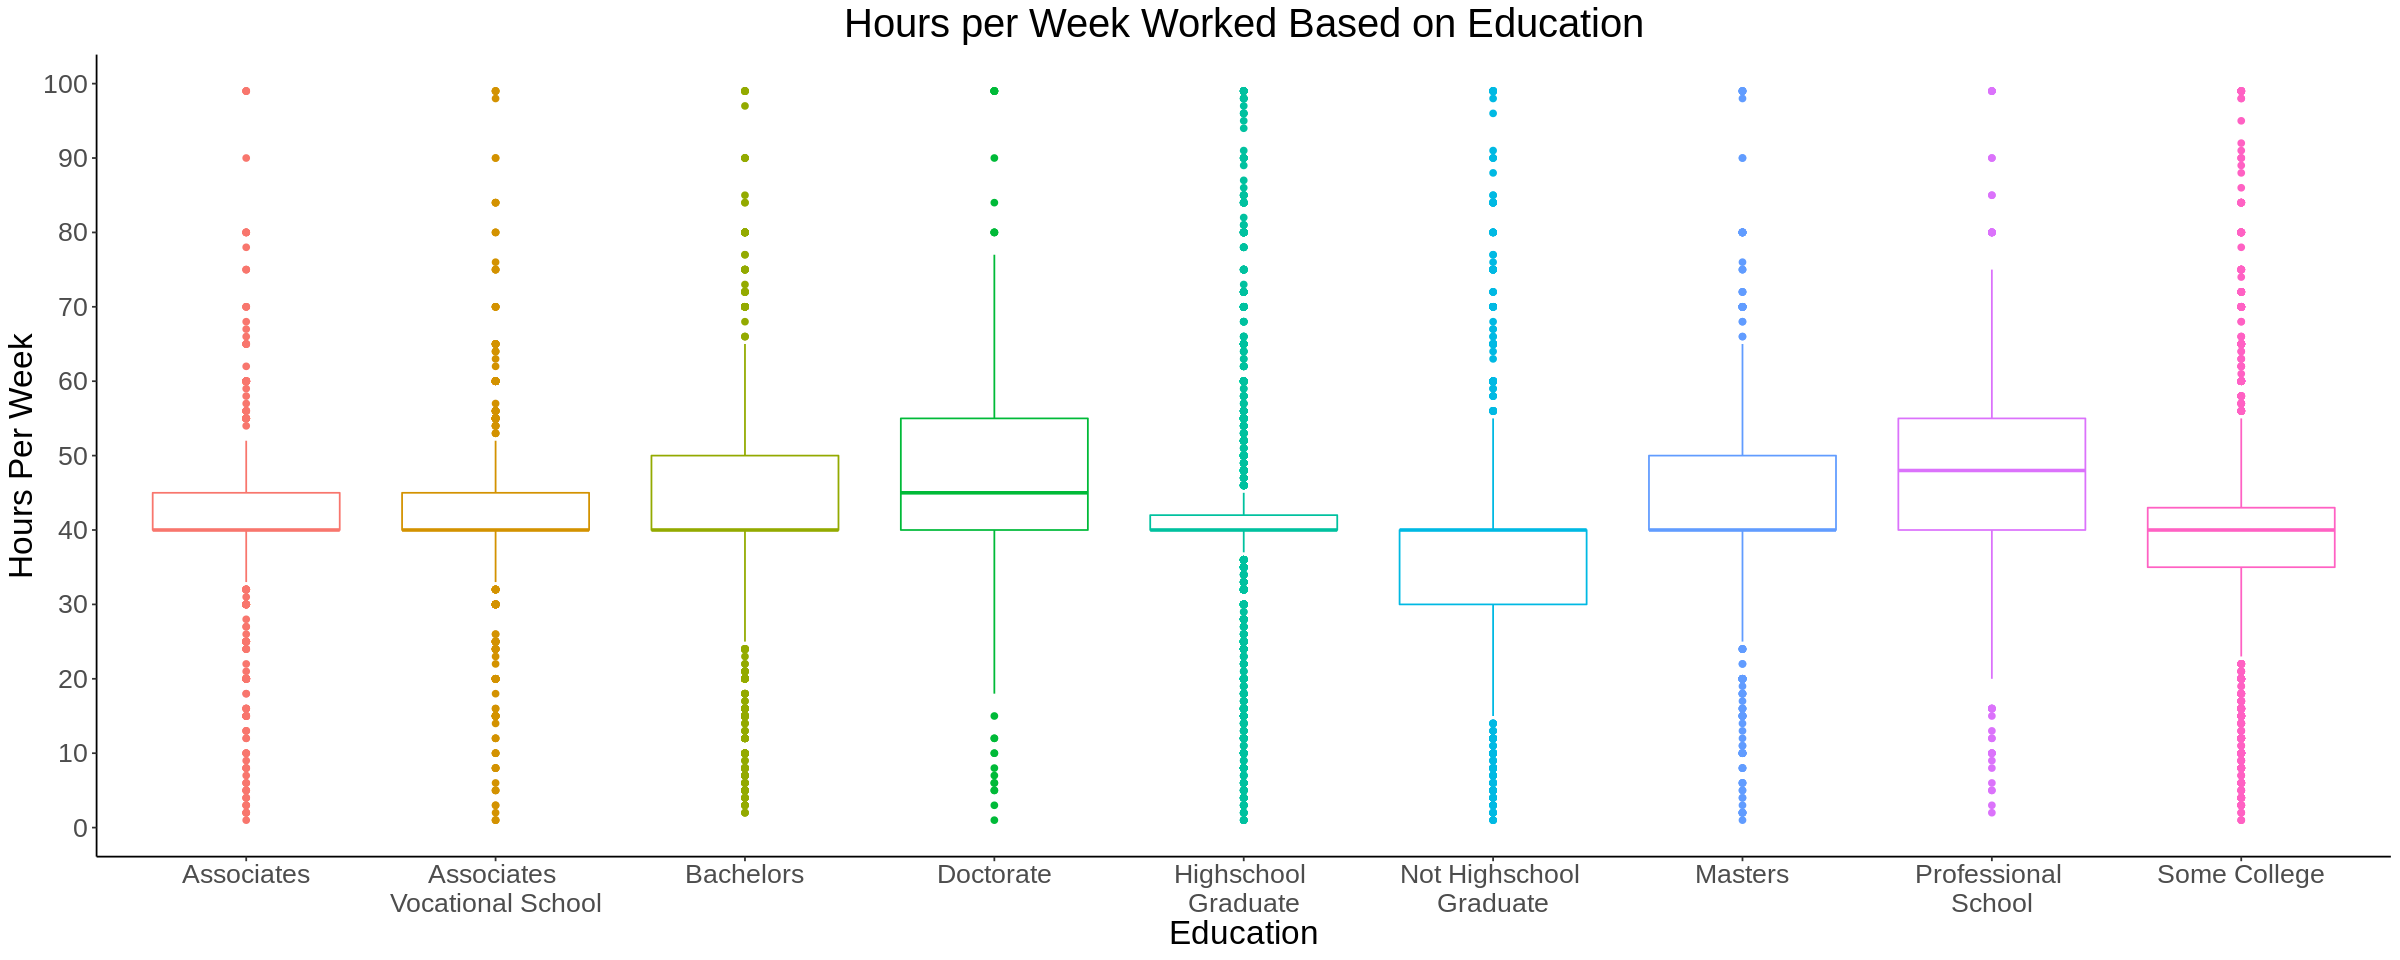

In [14]:
hrs_per_week_education

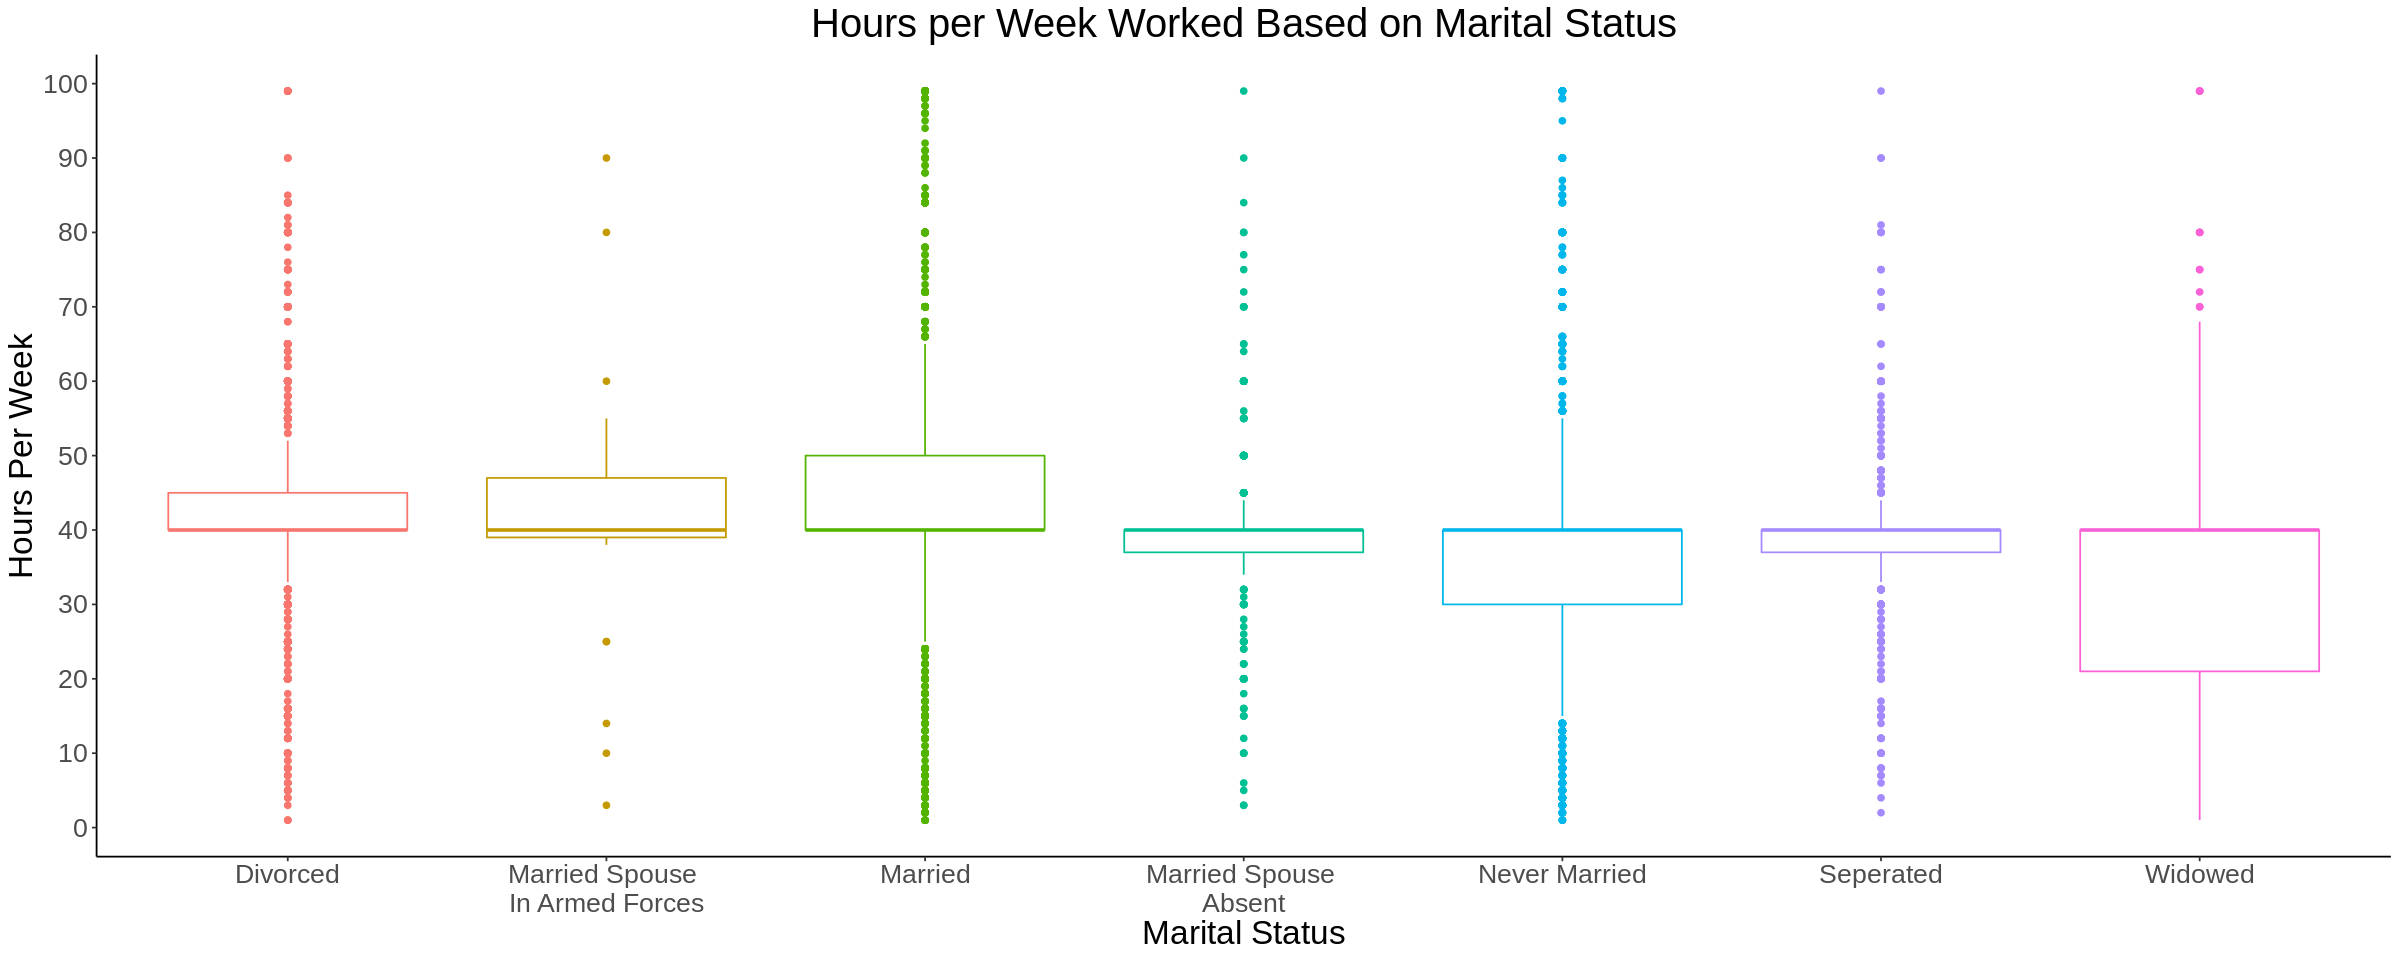

In [15]:
hrs_per_week_marital_status

### Statistics of Our Dataset

In [16]:
hrs_work_class <- data %>%
    group_by(work_class) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_education <- data %>%
    group_by(education) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

hrs_marital_status <- data %>%
    group_by(marital_status) %>%
    summarise(mean_hours_per_week = mean(hours_per_week),
             sd_hours_per_week = sd(hours_per_week))

**Mean Hours Worked Based on Workclass and Standard Deviation**

In [17]:
head(hrs_work_class)

work_class,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
?,31.91939,14.909903
Federal-gov,41.37917,8.838605
Local-gov,40.98280,10.771559
Never-worked,28.42857,15.186147
Private,40.26710,11.256298
Self-emp-inc,48.81810,13.900417


**Mean Hours Worked Based on Education Level and Standard Deviation**

In [18]:
head(hrs_education)

education,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Assoc-acdm,40.50422,12.19667
Assoc-voc,41.61071,10.79338
Bachelors,42.61401,11.44619
Doctorate,46.97337,15.08445
HS-grad,40.57537,11.33376
Less-than-HS,36.71785,13.34644


**Mean Hours Worked Based on Marital Status and Standard Deviation**

In [19]:
head(hrs_marital_status)

marital_status,mean_hours_per_week,sd_hours_per_week
<chr>,<dbl>,<dbl>
Divorced,41.24668,10.67663
Married-AF-spouse,41.13043,19.44060
Married-civ-spouse,43.28486,11.90505
Married-spouse-absent,39.66986,11.76737
Never-married,36.94000,12.43254
Separated,39.30146,10.37753


In [20]:
bar_means_hrs_work_class <- hrs_work_class %>%
    ggplot(aes(x = work_class, y = mean_hours_per_week, fill = work_class)) +
    geom_bar(stat = "identity") +
    xlab("Work Class") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Work Class") +
    plot_config +
    workclass_labels

bar_means_hrs_education <- hrs_education %>%
    ggplot(aes(x = education, y = mean_hours_per_week, fill = education)) +
    geom_bar(stat = "identity") +
    xlab("Education Level") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked For Each Education Level") +
    plot_config +
    education_labels

bar_means_marital_status <- hrs_marital_status %>%
    ggplot(aes(x = marital_status, y = mean_hours_per_week, fill = marital_status)) +
    geom_bar(stat = "identity") +
    xlab("Marital Status") +
    ylab("Mean Hours Worked") +
    ggtitle("Mean Hours Worked Based on Marital Status") +
    plot_config +
    marital_status_labels

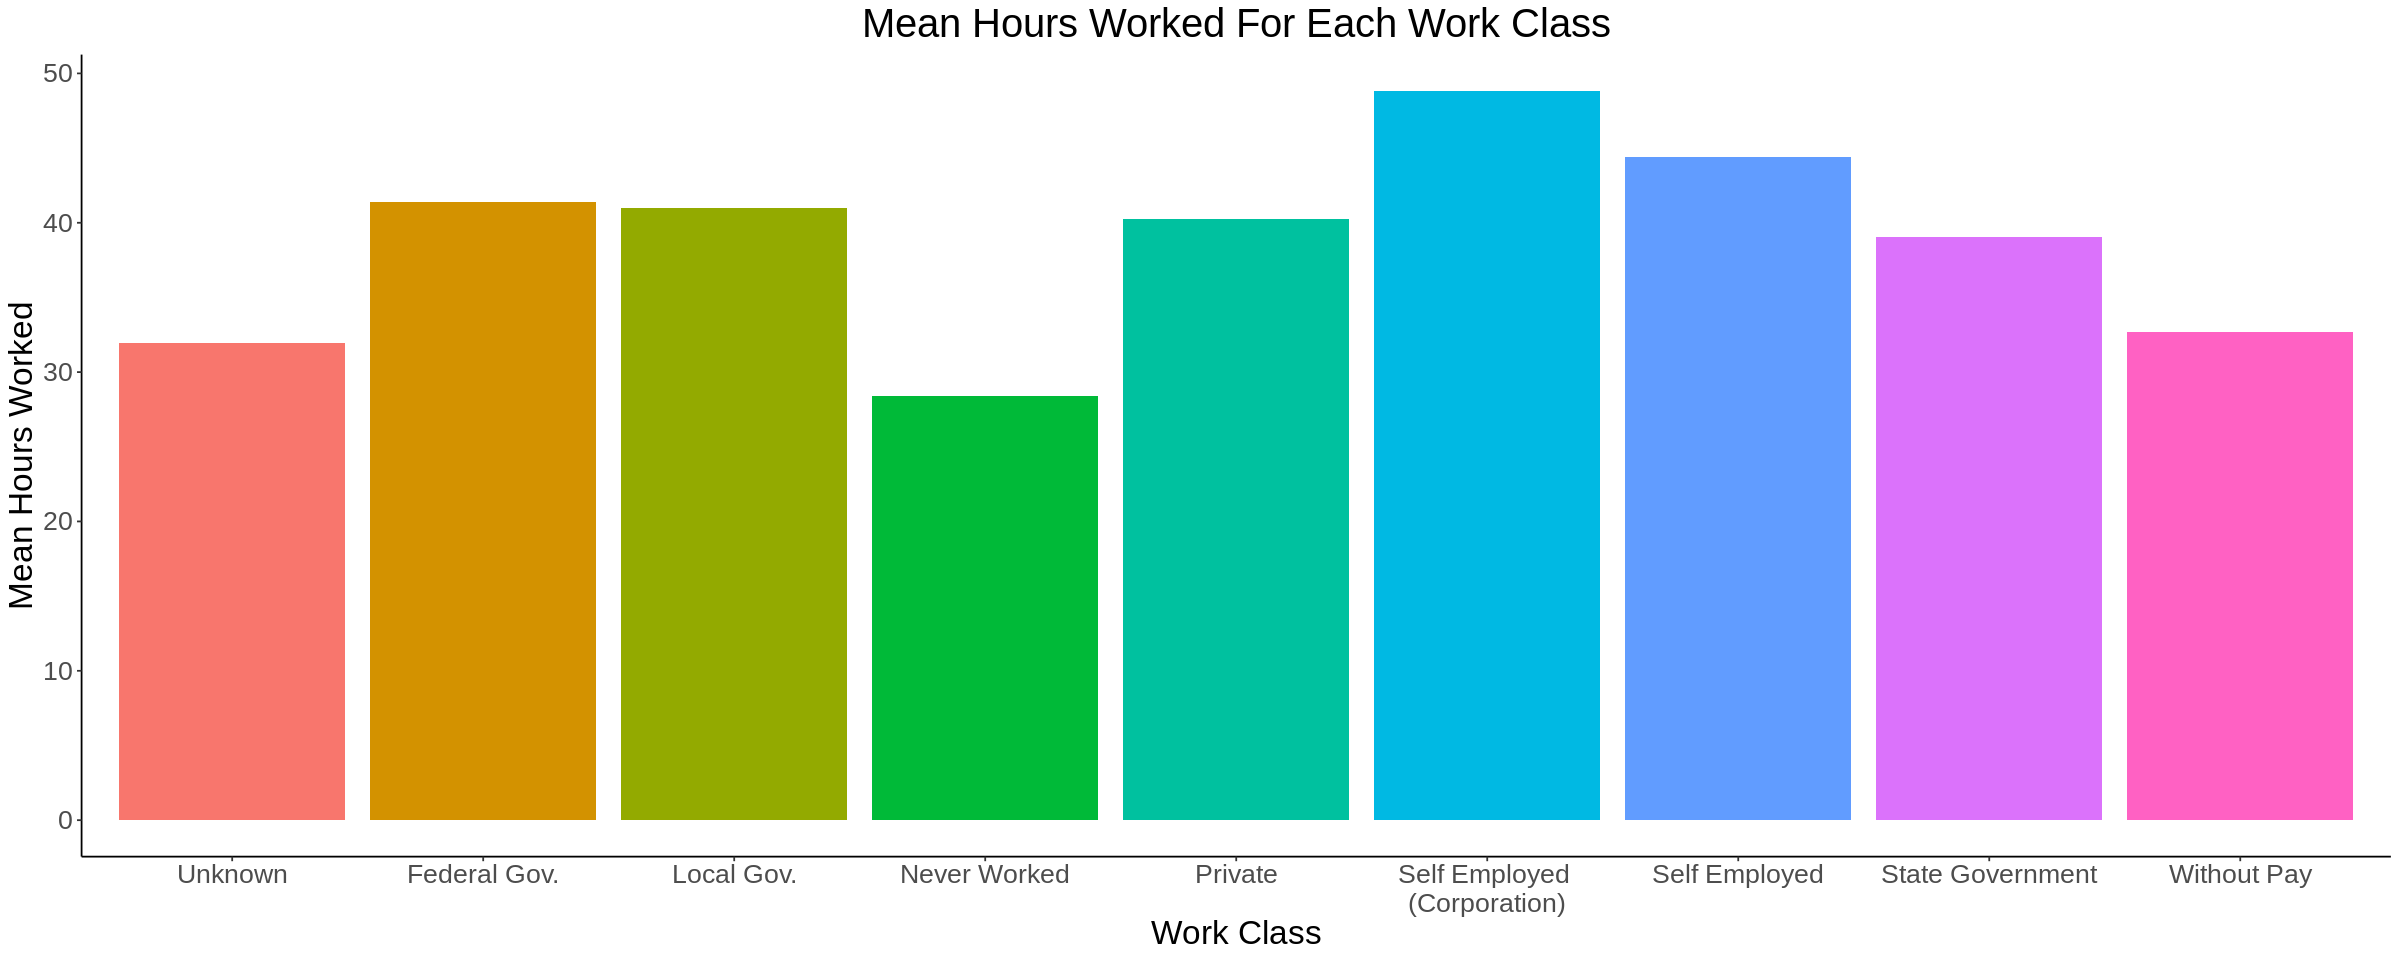

In [21]:
bar_means_hrs_work_class

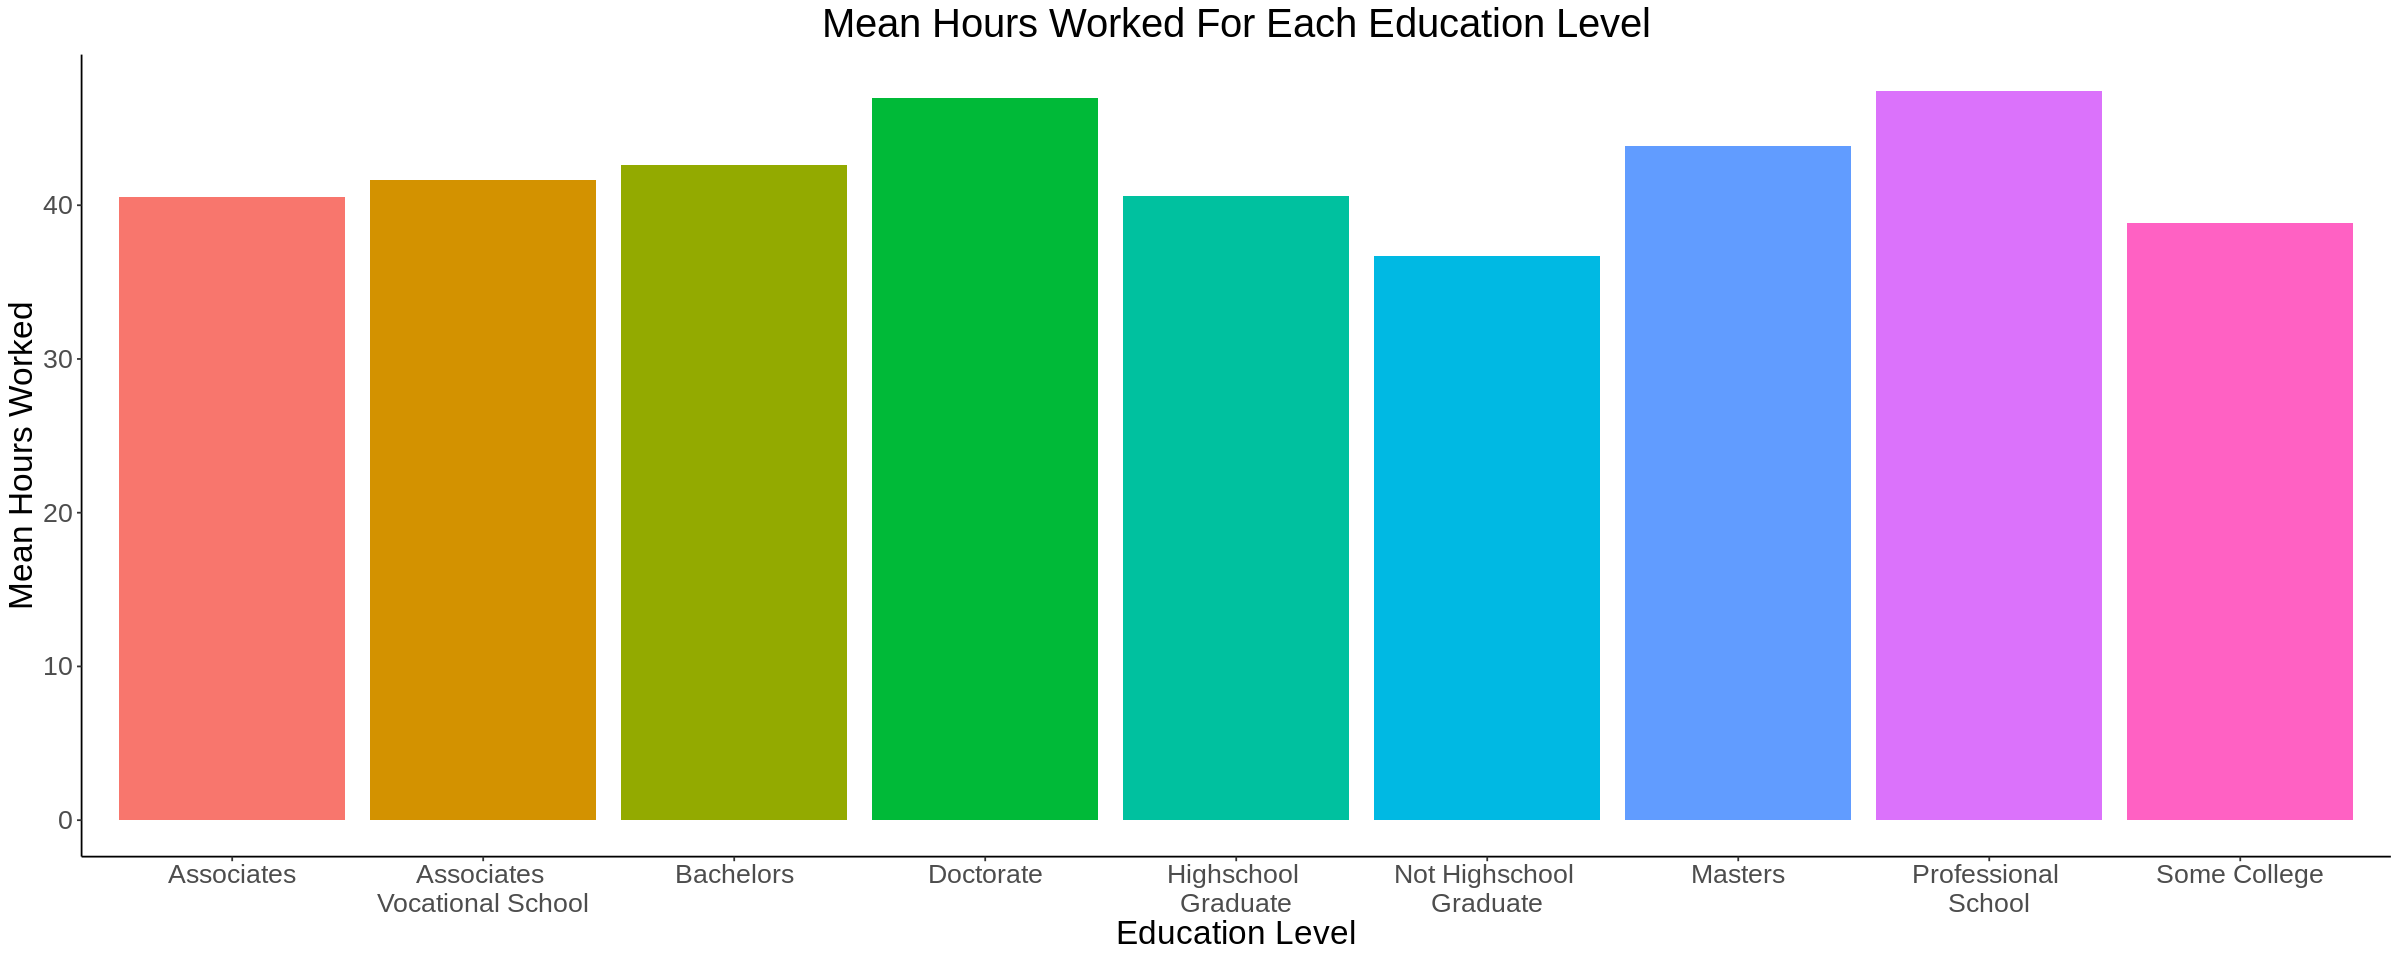

In [22]:
bar_means_hrs_education

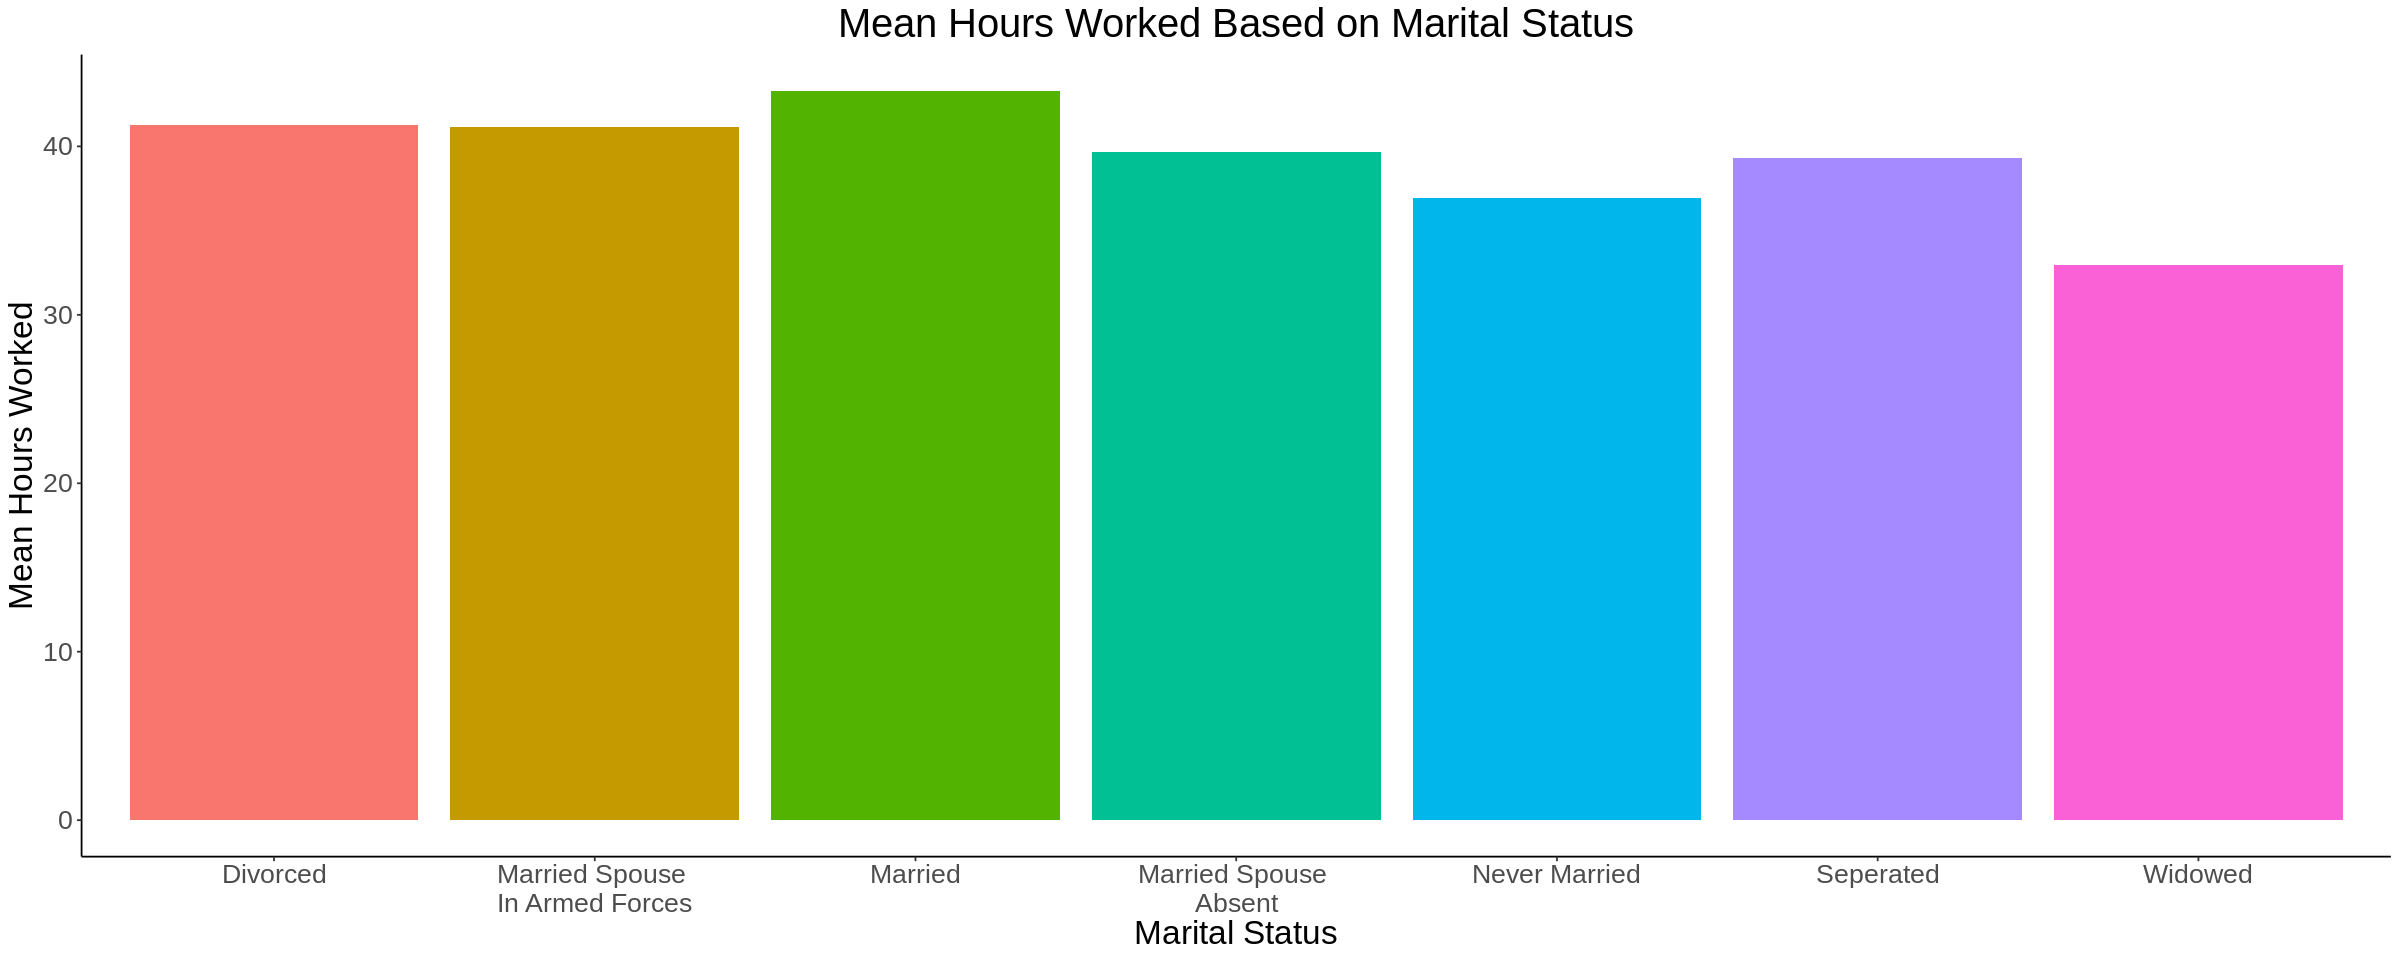

In [23]:
bar_means_marital_status

## Methods

Project Trustworthiness:

- The data used in this report is extracted from the 1994 U.S. Census Bureau database, and more than 50 papers have cited the data, proving the authenticity and validity of the data.
- Our report fully organizes the raw data, filtering out the variables and attributes of interest. These adequate preparations can reduce our practical error rate in operation and guarantee the reliability of the report.
- The sample space of the data we use is large enough, with more than 30,000 observations, which will reduce sampling bias.

Reasoning why plots and estimates are not enough:
- Differences in average weekly working hours for different education levels, job classifications, and marital status were not significant enough.
- The relationship between these variables and average working hours per week cannot be determined clearly from the statistics(mean and standard deviation) which calculated from original data set.
- The hypothesis test below show that we can not reject the NULL hypothesis since the p value is greater than the significant level (0.01). There is not enough evidence to show alter is correct.

Project Expectation:

- We expect to find significant difference in mean hours worked among different levels of education, as well as work class.
- We also expect a finding that no significant difference in mean hours worked among different marital status.
    

Project Impact:

- Finding from levels of education will help students in their choice of education advancement with the factor of working hours.
- Finding from work class will help job seeker to calibrate their expectation of the jobs.
- Finding from marital status will help employers to identify that marital status should not be factored into recruitment.


Future questions:

- How does mean hours worked affect income?
- Which working class has higher mean hours worked?
- Is there a change in marital status within the range of certain length of working hours?

## Confidence Intervals for Further Analysis of Working Hours with Education Level

We will be further studying how the mean work hours of people with an education less than highschool compares to those with more than highschool

In [24]:
data$education[data$education == "Assoc-acdm" |
               data$education == "Assoc-voc" |
               data$education == "Bachelors" |
               data$education == "Doctorate" |
               data$education == "HS-grad" |
               data$education == "Masters" |
               data$education == "Prof-school" |
               data$education == "Some-college"] = "More-than-HS"
compare_hour_low_hi <- data |> 
    group_by(education) |> 
    summarize(mean_hours_per_week=mean(hours_per_week)) |>
    pull()

less_than_hs_mean <- compare_hour_low_hi[1]
more_than_hs_mean <- compare_hour_low_hi[2]

education_hour_table <- data |> 
    select(education,hours_per_week)

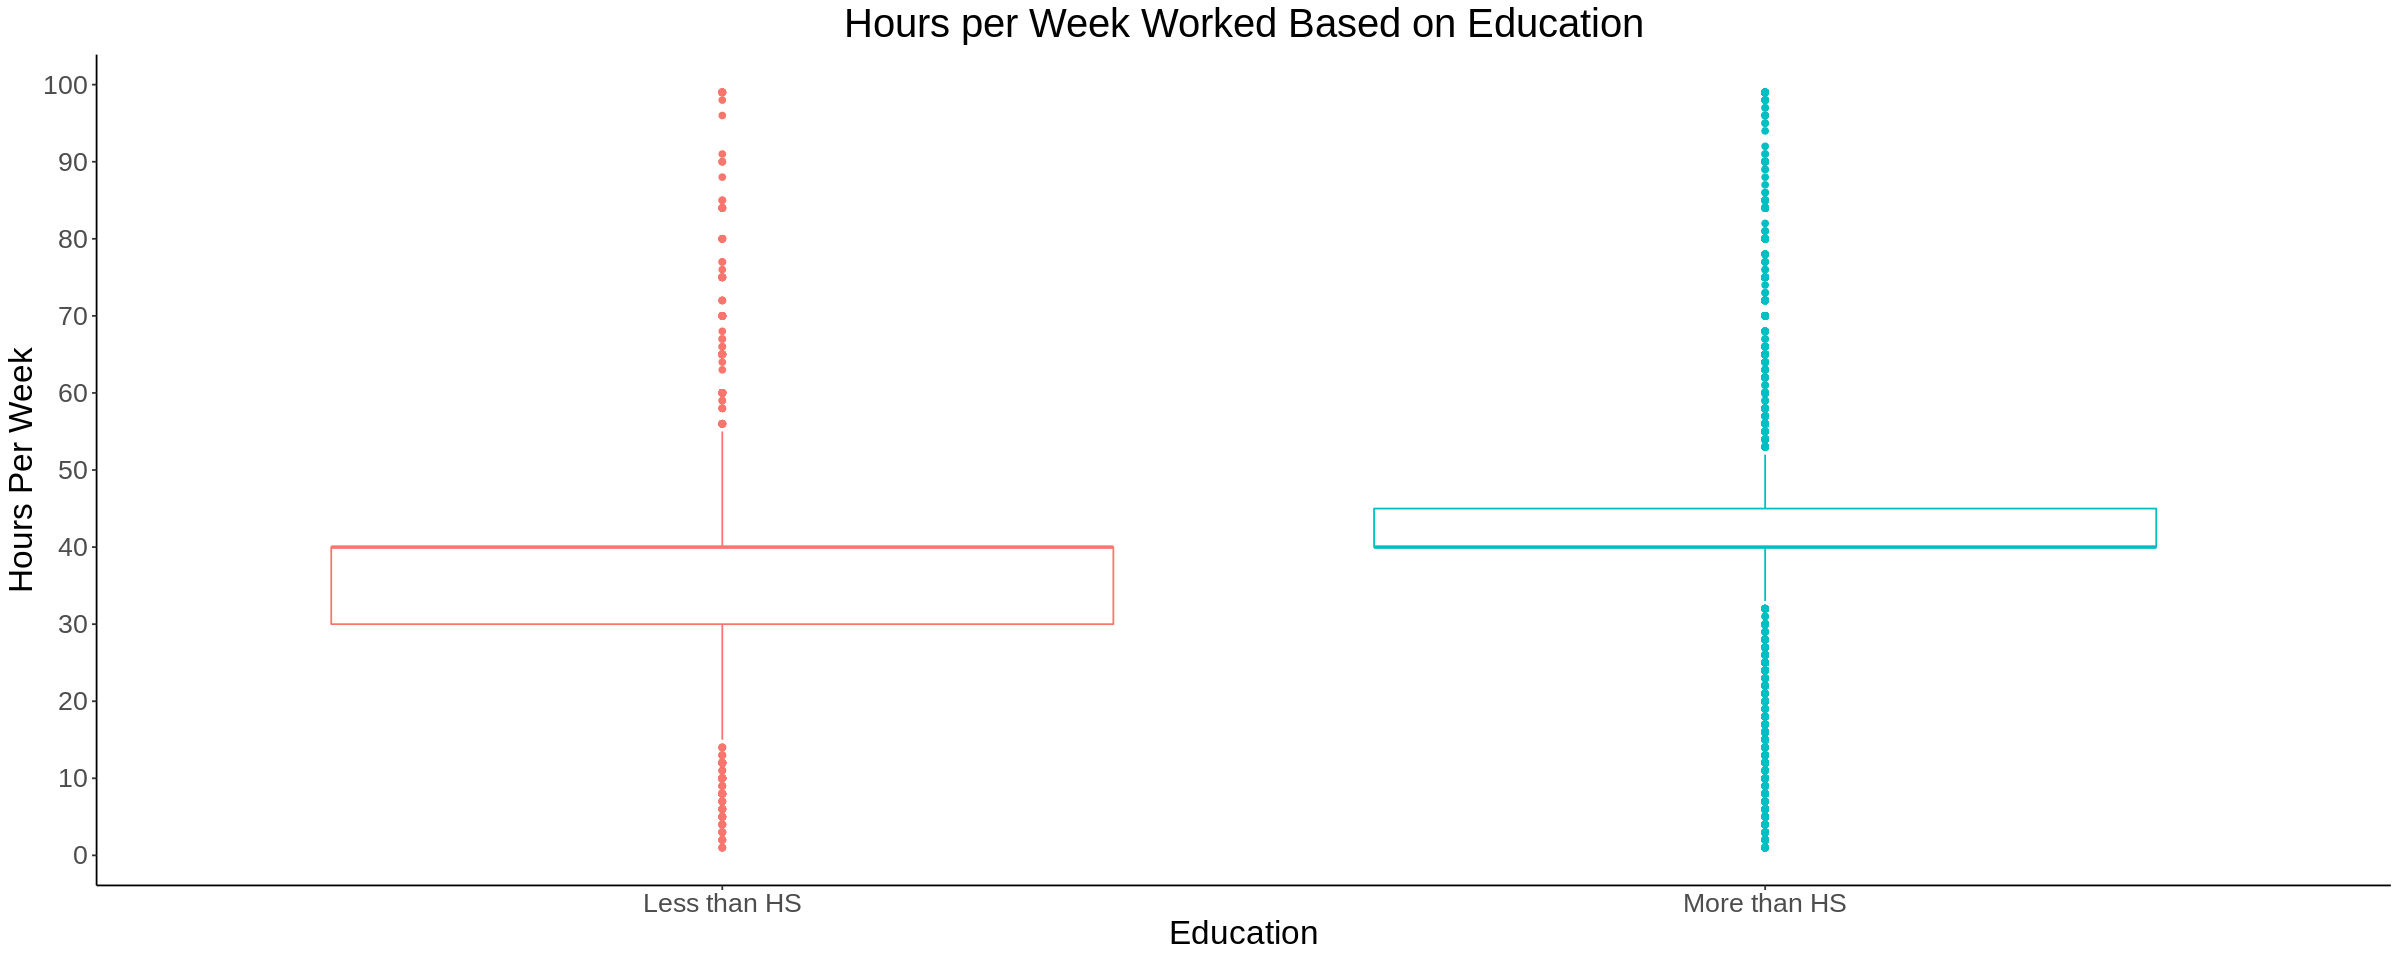

In [25]:
education_hour_box_plot <- education_hour_table %>%
    ggplot(aes(x = education, y = hours_per_week, color = education)) +
    geom_boxplot() +
    xlab("Education") +
    ylab("Hours Per Week") +
    ggtitle("Hours per Week Worked Based on Education") +
    plot_config +
    boxplot_scale +
    scale_x_discrete(labels = c("Less than HS", "More than HS"))
education_hour_box_plot

### Bootstraping Method

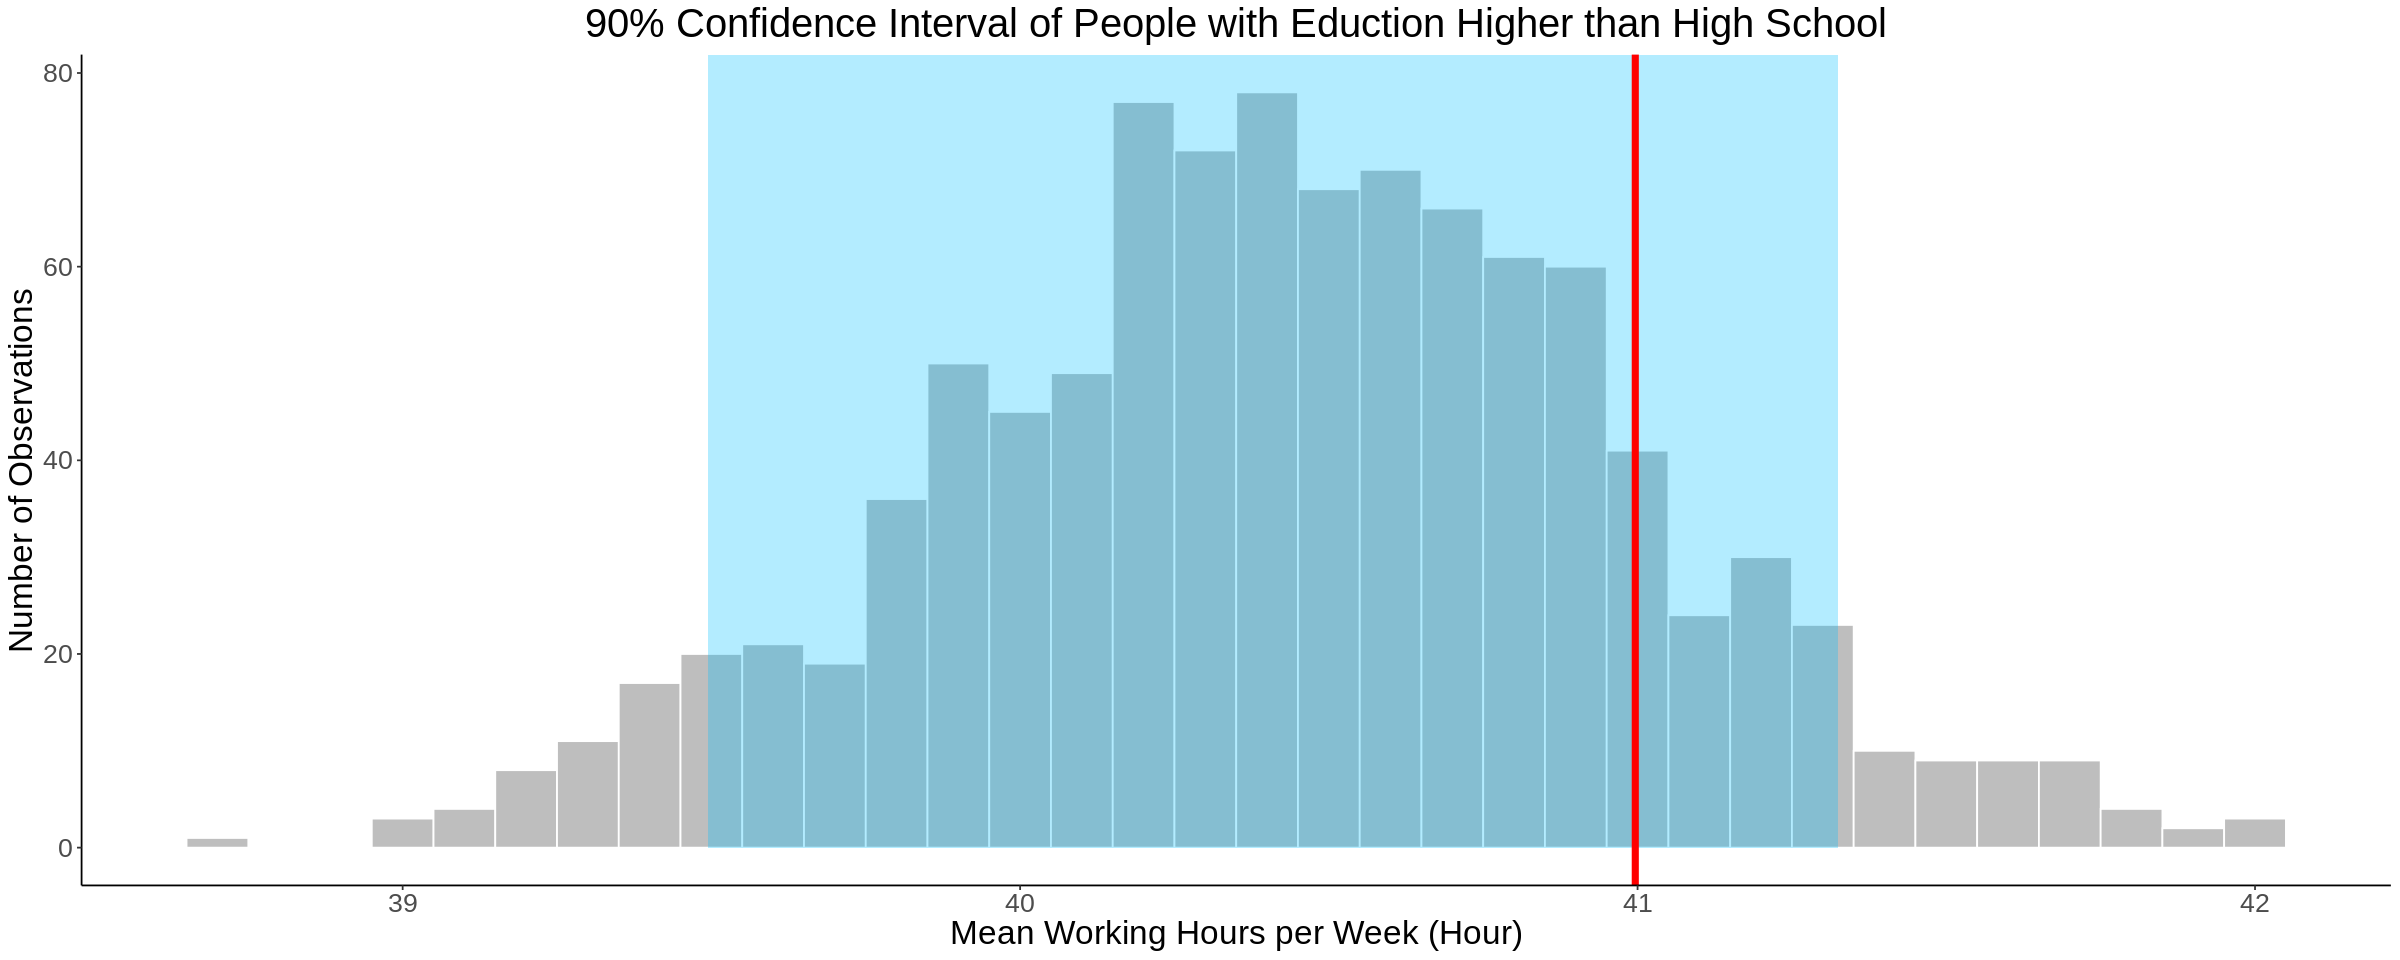

In [26]:
set.seed(50)
more_than_high_school_sample_1 <- education_hour_table |> 
    filter(education == "More-than-HS") |> 
    rep_sample_n(reps = 1, size = 500, replace = FALSE) |> 
    ungroup() |> 
    select(hours_per_week)
bootstrap_dist_1 <- more_than_high_school_sample_1 |>
    rep_sample_n(reps= 1000, size = 500, replace = TRUE) |> 
    group_by(replicate) |> 
    summarize(mean_working_hour = mean(hours_per_week)) |> 
    select(mean_working_hour)
ci_1 <- bootstrap_dist_1 |> 
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))
ci_plot_1 <- 
    bootstrap_dist_1 %>% 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_1$ci_lower, xmax = ci_1$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = more_than_hs_mean,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People with Eduction Higher than High School",
         x = "Mean Working Hours per Week (Hour)",
         y = "Number of Observations")  +
    plot_config
ci_plot_1

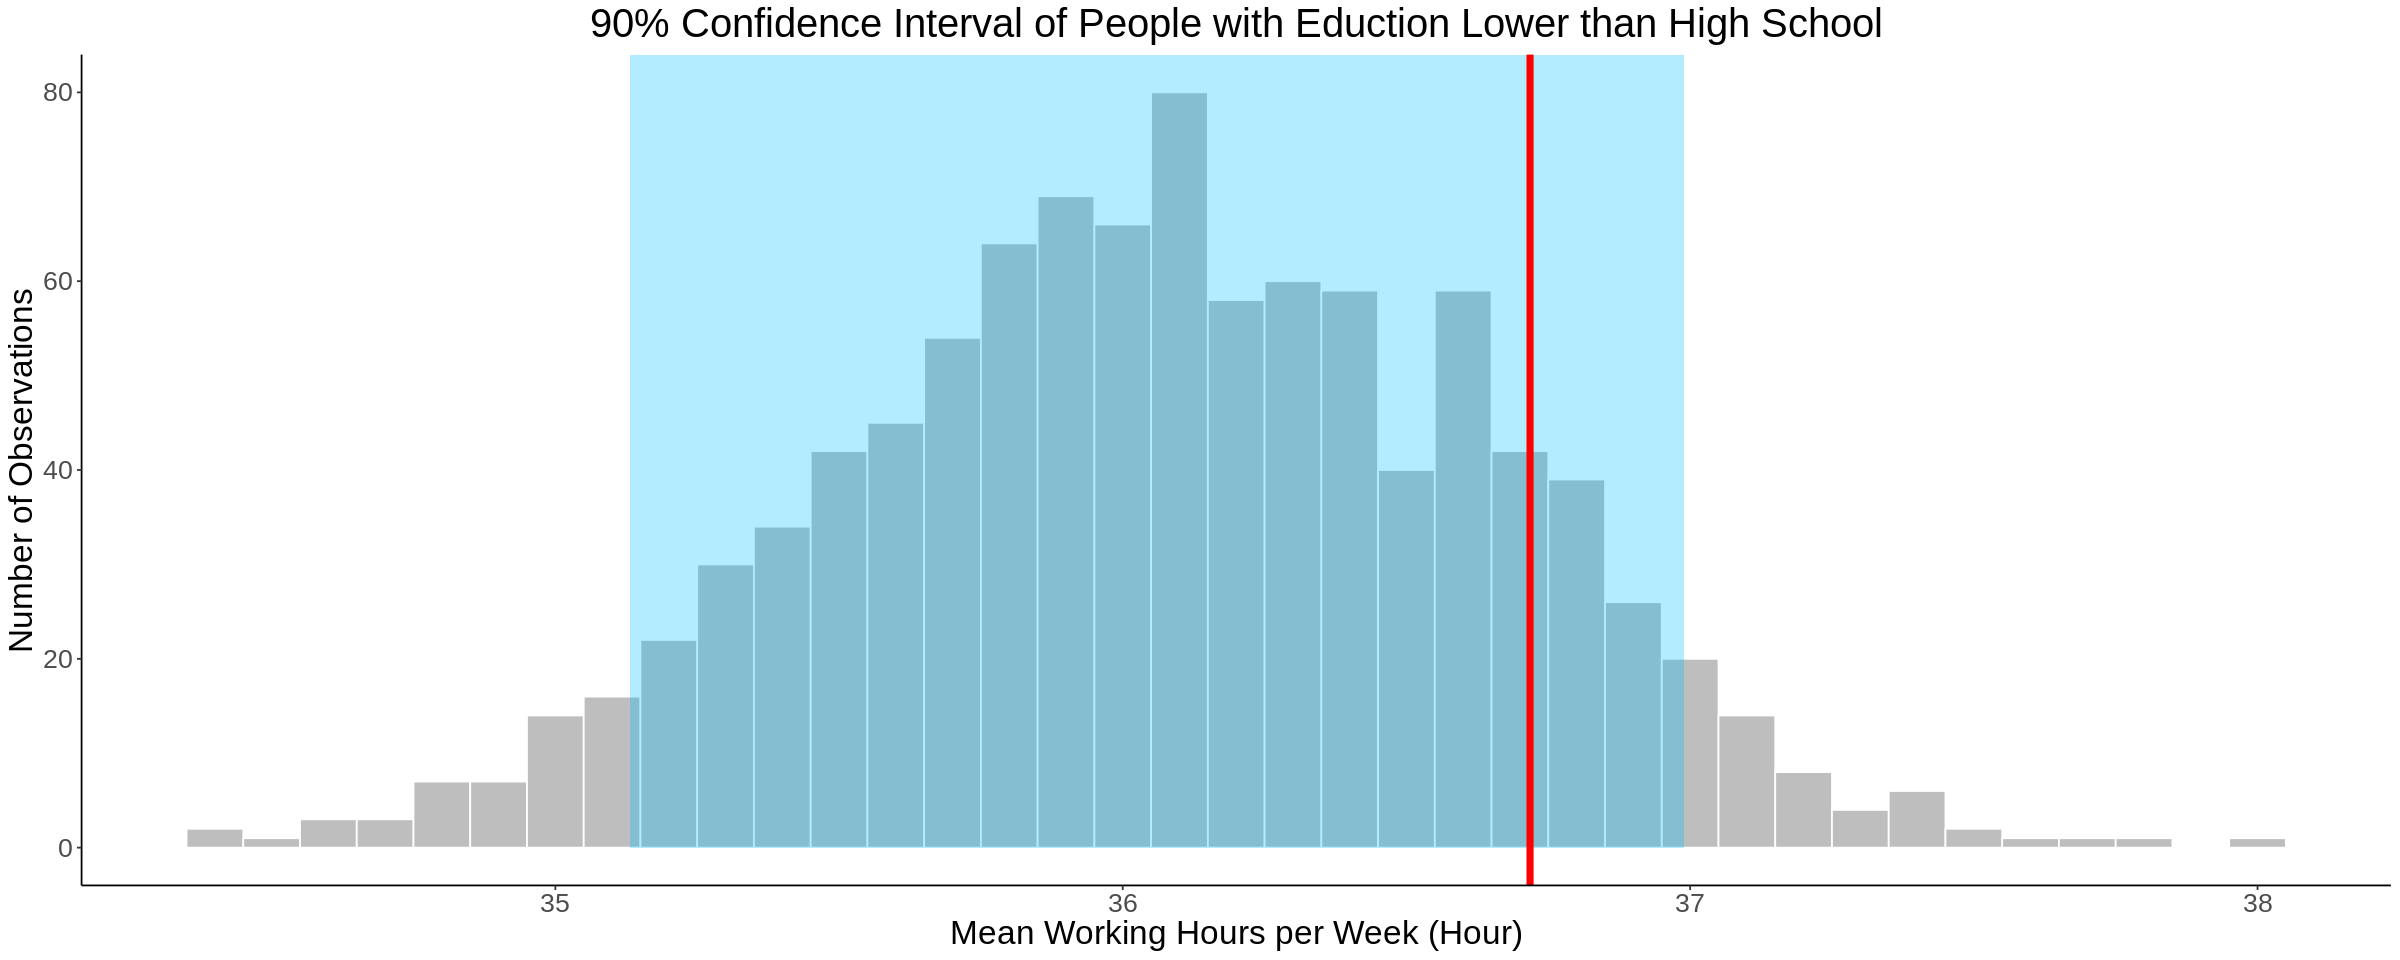

In [27]:
lower_than_high_school_sample_1 <- education_hour_table |> 
    filter(education == "Less-than-HS") |> 
    rep_sample_n(reps = 1, size = 500, replace = FALSE) |> 
    ungroup() |> 
    select(hours_per_week)
bootstrap_dist_2 <- lower_than_high_school_sample_1 |>
    rep_sample_n(reps= 1000, size = 500, replace = TRUE) |> 
    group_by(replicate) |> 
    summarize(mean_working_hour = mean(hours_per_week)) |> 
    select(mean_working_hour)
ci_2 <- bootstrap_dist_2 |> 
    summarize(ci_lower = quantile(mean_working_hour,0.05),
              ci_upper = quantile(mean_working_hour,0.95))
ci_plot_2 <- 
    bootstrap_dist_2 %>% 
    ggplot(aes(x = mean_working_hour)) +
    geom_histogram(colour = "white", fill = "grey", binwidth = 0.1) +
    annotate("rect", xmin = ci_2$ci_lower, xmax = ci_2$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = less_than_hs_mean,
               size = 2,
               colour = "red") +
    labs(title = "90% Confidence Interval of People with Eduction Lower than High School",
         x = "Mean Working Hours per Week (Hour)",
        y = "Number of Observations") +
    plot_config
ci_plot_2

### Asymptotic Method

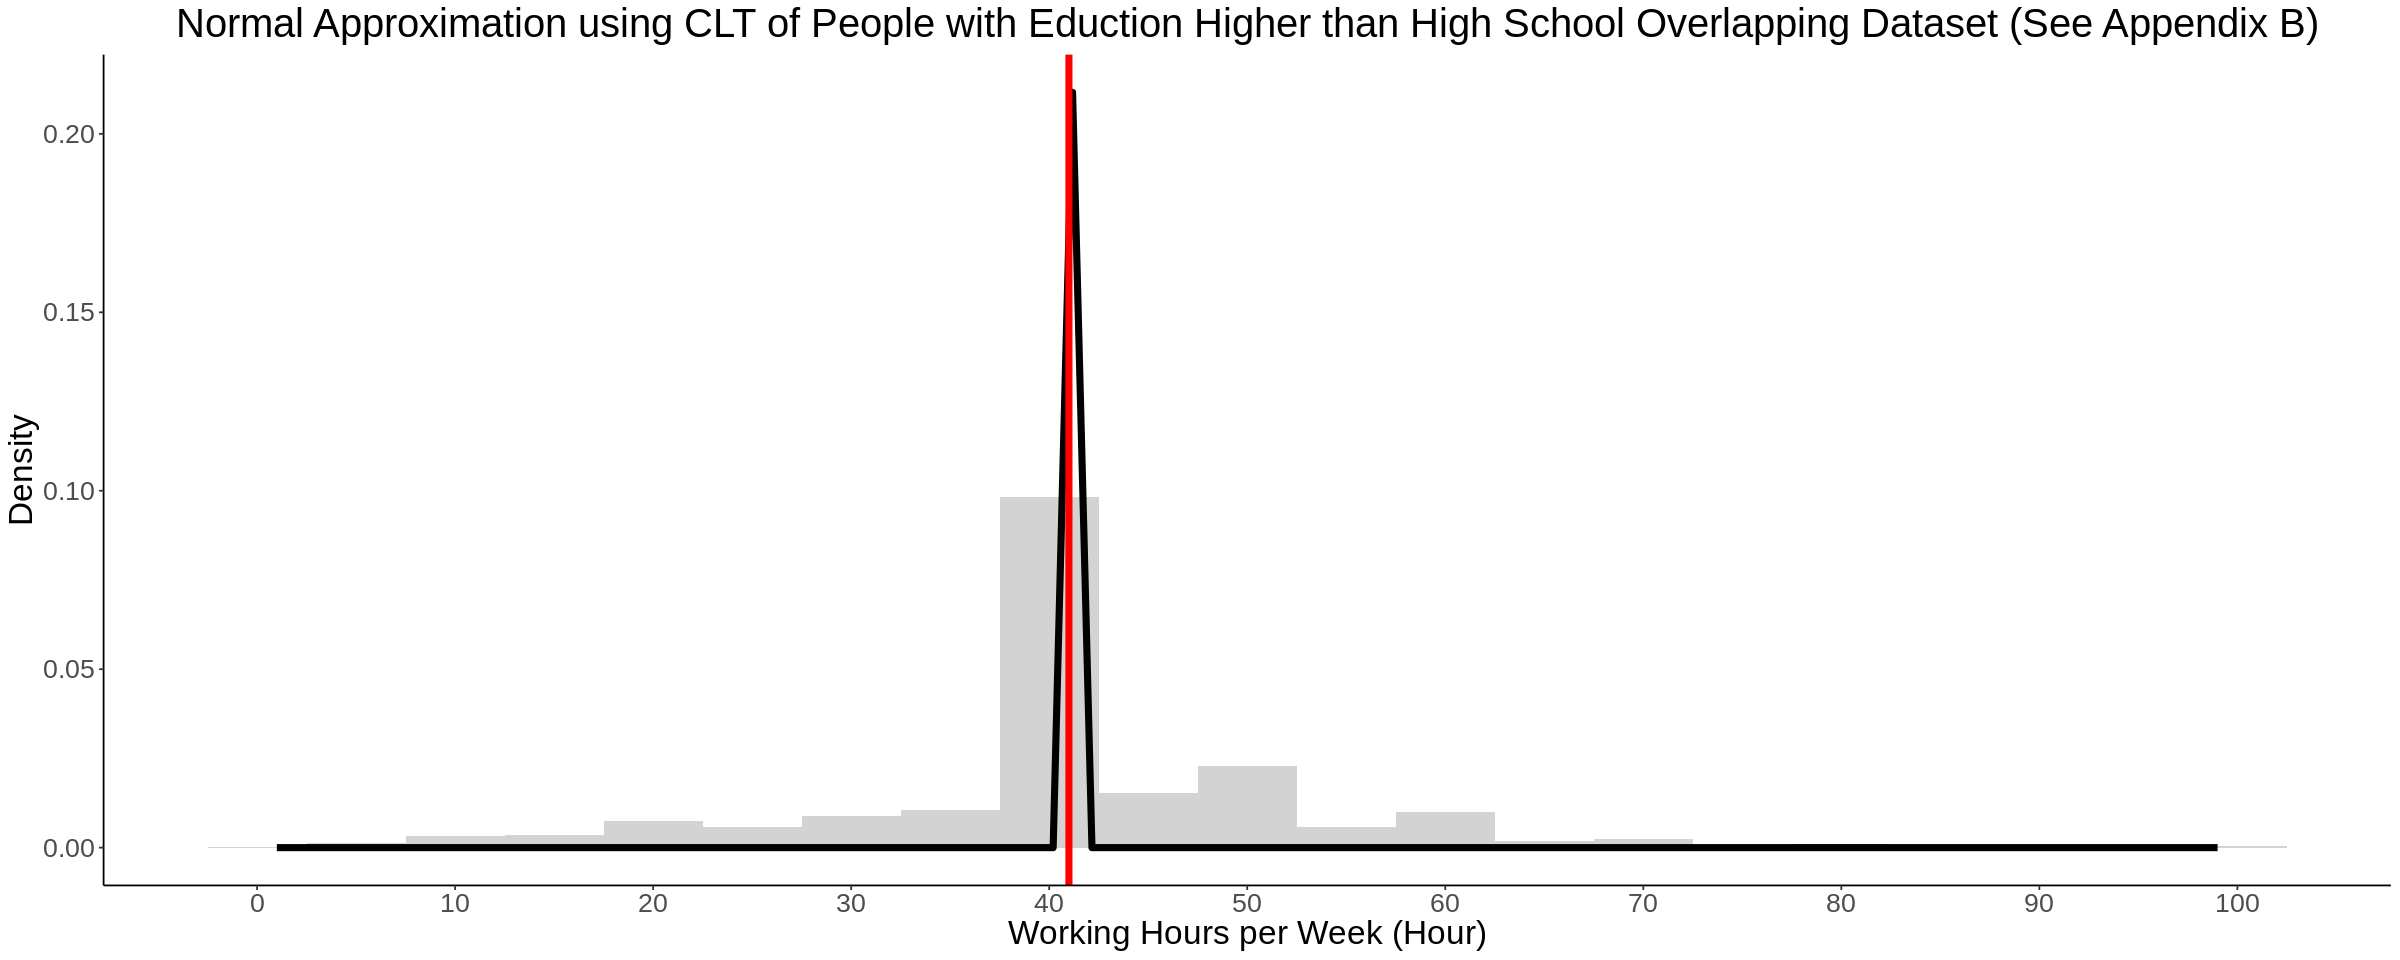

In [28]:
# CLT states, as n -> inf, X ~ Norm(mean, sd/sqrt(n))

more_hs = data %>%
    filter(education == "More-than-HS")

more_hs %>% 
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y =..density..), fill = "lightgray", binwidth = 5) +
    labs(title = "Normal Approximation using CLT of People with Eduction Higher than High School Overlapping Dataset (See Appendix B)",
         x = "Working Hours per Week (Hour)",
         y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(more_hs$hours_per_week),
                                           sd = sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))),
                 color = "black", size = 2) +
    plot_config +
    scale_x_continuous(breaks = seq(0, 100, 10)) +
    geom_vline(xintercept = mean(more_hs$hours_per_week),
               size = 2,
               colour = "red")

**90% Confidence Interval for Asymptotic Method of People with Eduction Higher than High School**

In [29]:
tibble("Mean" = mean(more_hs$hours_per_week),
               "Upper" = qnorm(0.025, mean(more_hs$hours_per_week), sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))),
               "Lower" = qnorm(0.95 + 0.025, mean(more_hs$hours_per_week), sd(more_hs$hours_per_week) / sqrt(nrow(more_hs))))


Mean,Upper,Lower
<dbl>,<dbl>,<dbl>
40.99629,40.85543,41.13715


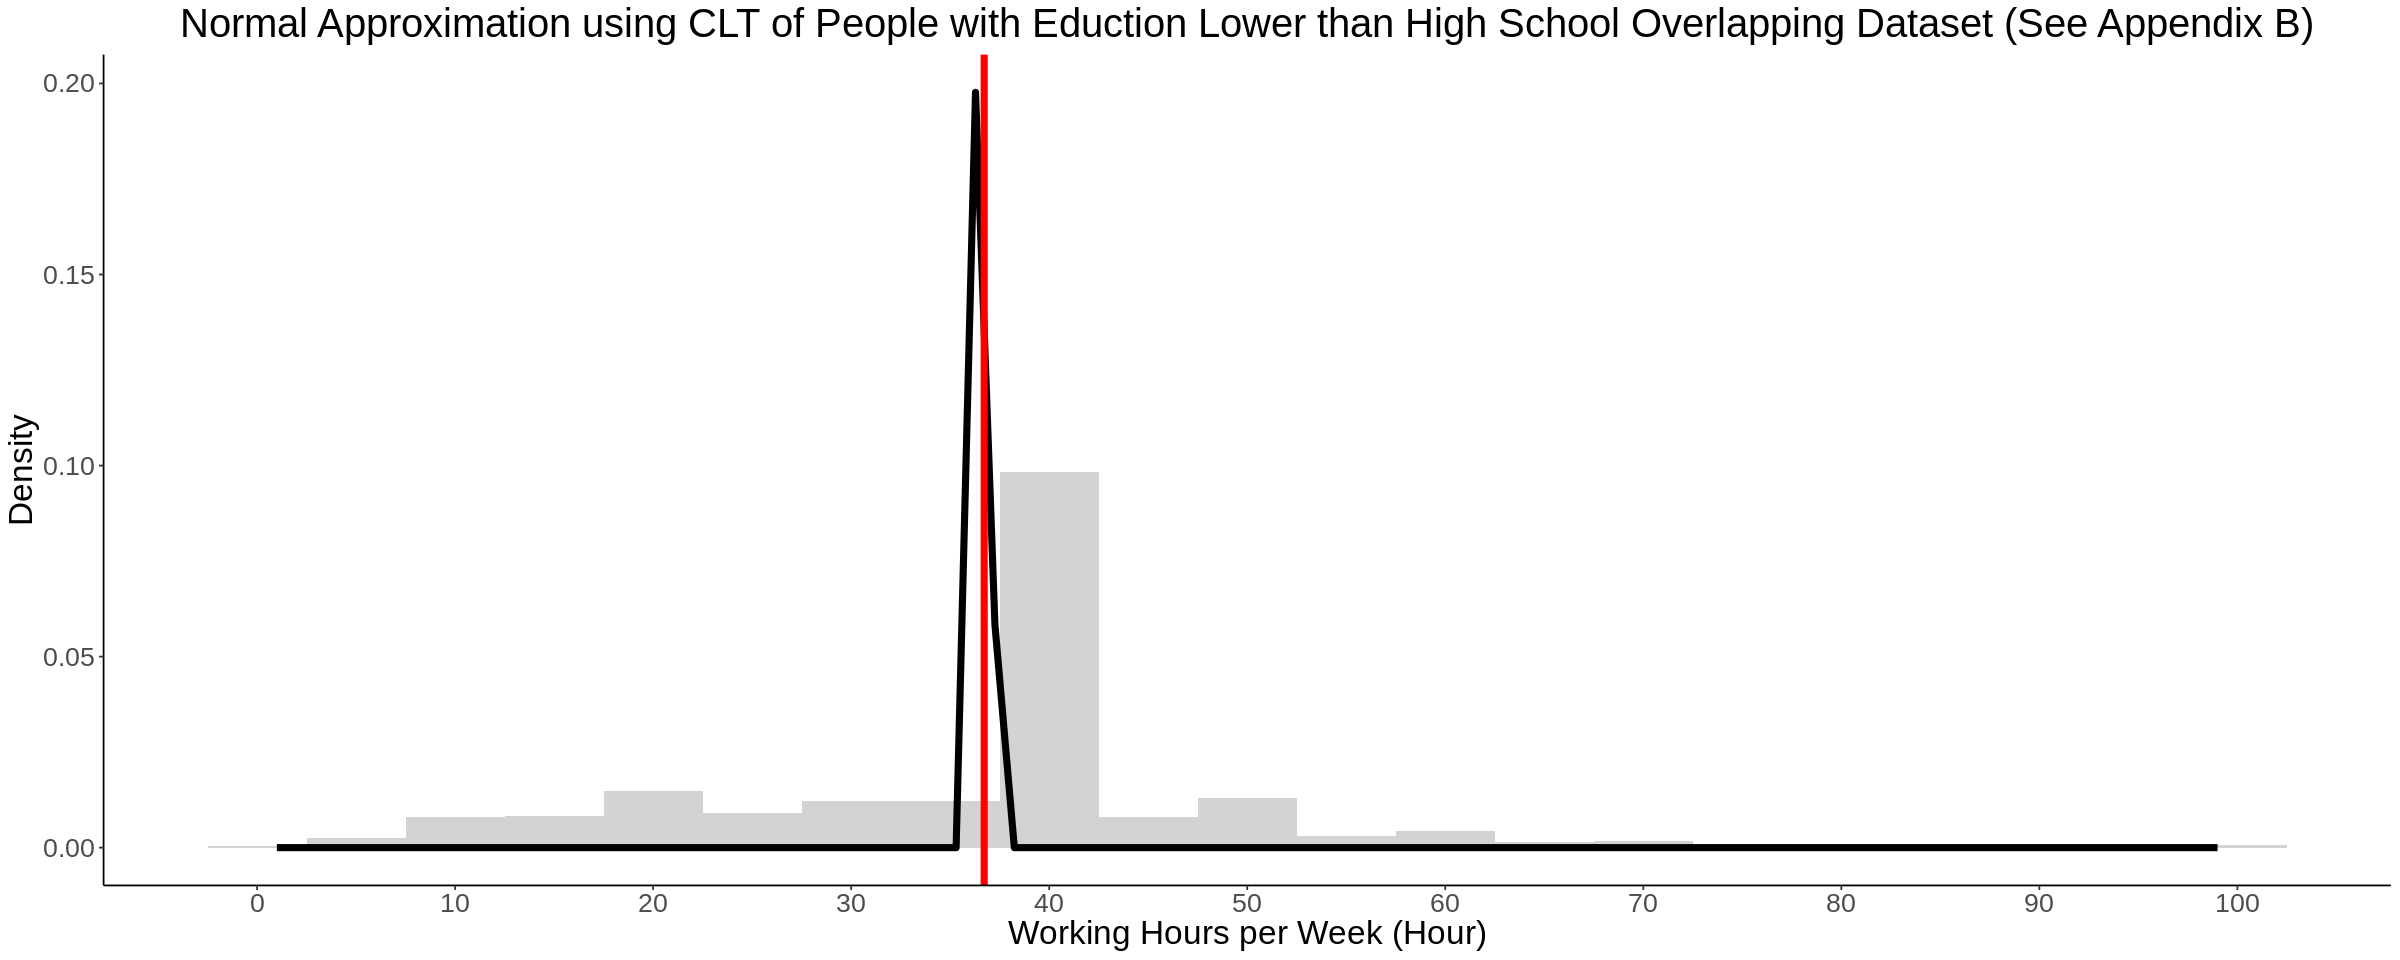

In [30]:
less_hs = data %>%
    filter(education == "Less-than-HS")

less_hs %>% 
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(aes(y =..density..), fill = "lightgray", binwidth = 5) +
    labs(title = "Normal Approximation using CLT of People with Eduction Lower than High School Overlapping Dataset (See Appendix B)",
         x = "Working Hours per Week (Hour)",
         y = "Density") +
    stat_function(fun = dnorm, args = list(mean = mean(less_hs$hours_per_week),
                                           sd = sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))),
                 color = "black", size = 2) +
    plot_config +
    scale_x_continuous(breaks = seq(0, 100, 10)) +
    geom_vline(xintercept = mean(less_hs$hours_per_week),
               size = 2,
               colour = "red")

**90% Confidence Interval for Asymptotic Method of People with Eduction Lower than High School**

In [31]:
tibble("Mean" = mean(less_hs$hours_per_week),
               "Upper" = qnorm(0.025, mean(less_hs$hours_per_week), sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))),
               "Lower" = qnorm(0.95 + 0.025, mean(less_hs$hours_per_week), sd(less_hs$hours_per_week) / sqrt(nrow(less_hs))))


Mean,Upper,Lower
<dbl>,<dbl>,<dbl>
36.71785,36.31673,37.11896


## Hypothesis Testing

- **NULL Hypothesis :** difference between mean of average working hours per week of More-than-HS people and Less-than-HS are 0
- **Alternate Hypothesis :** difference between mean of average working hours per week of More-than-HS people and Less-than-HS are greater than 0

`summarise()` has grouped output by 'replicate'. You can override using the `.groups` argument.



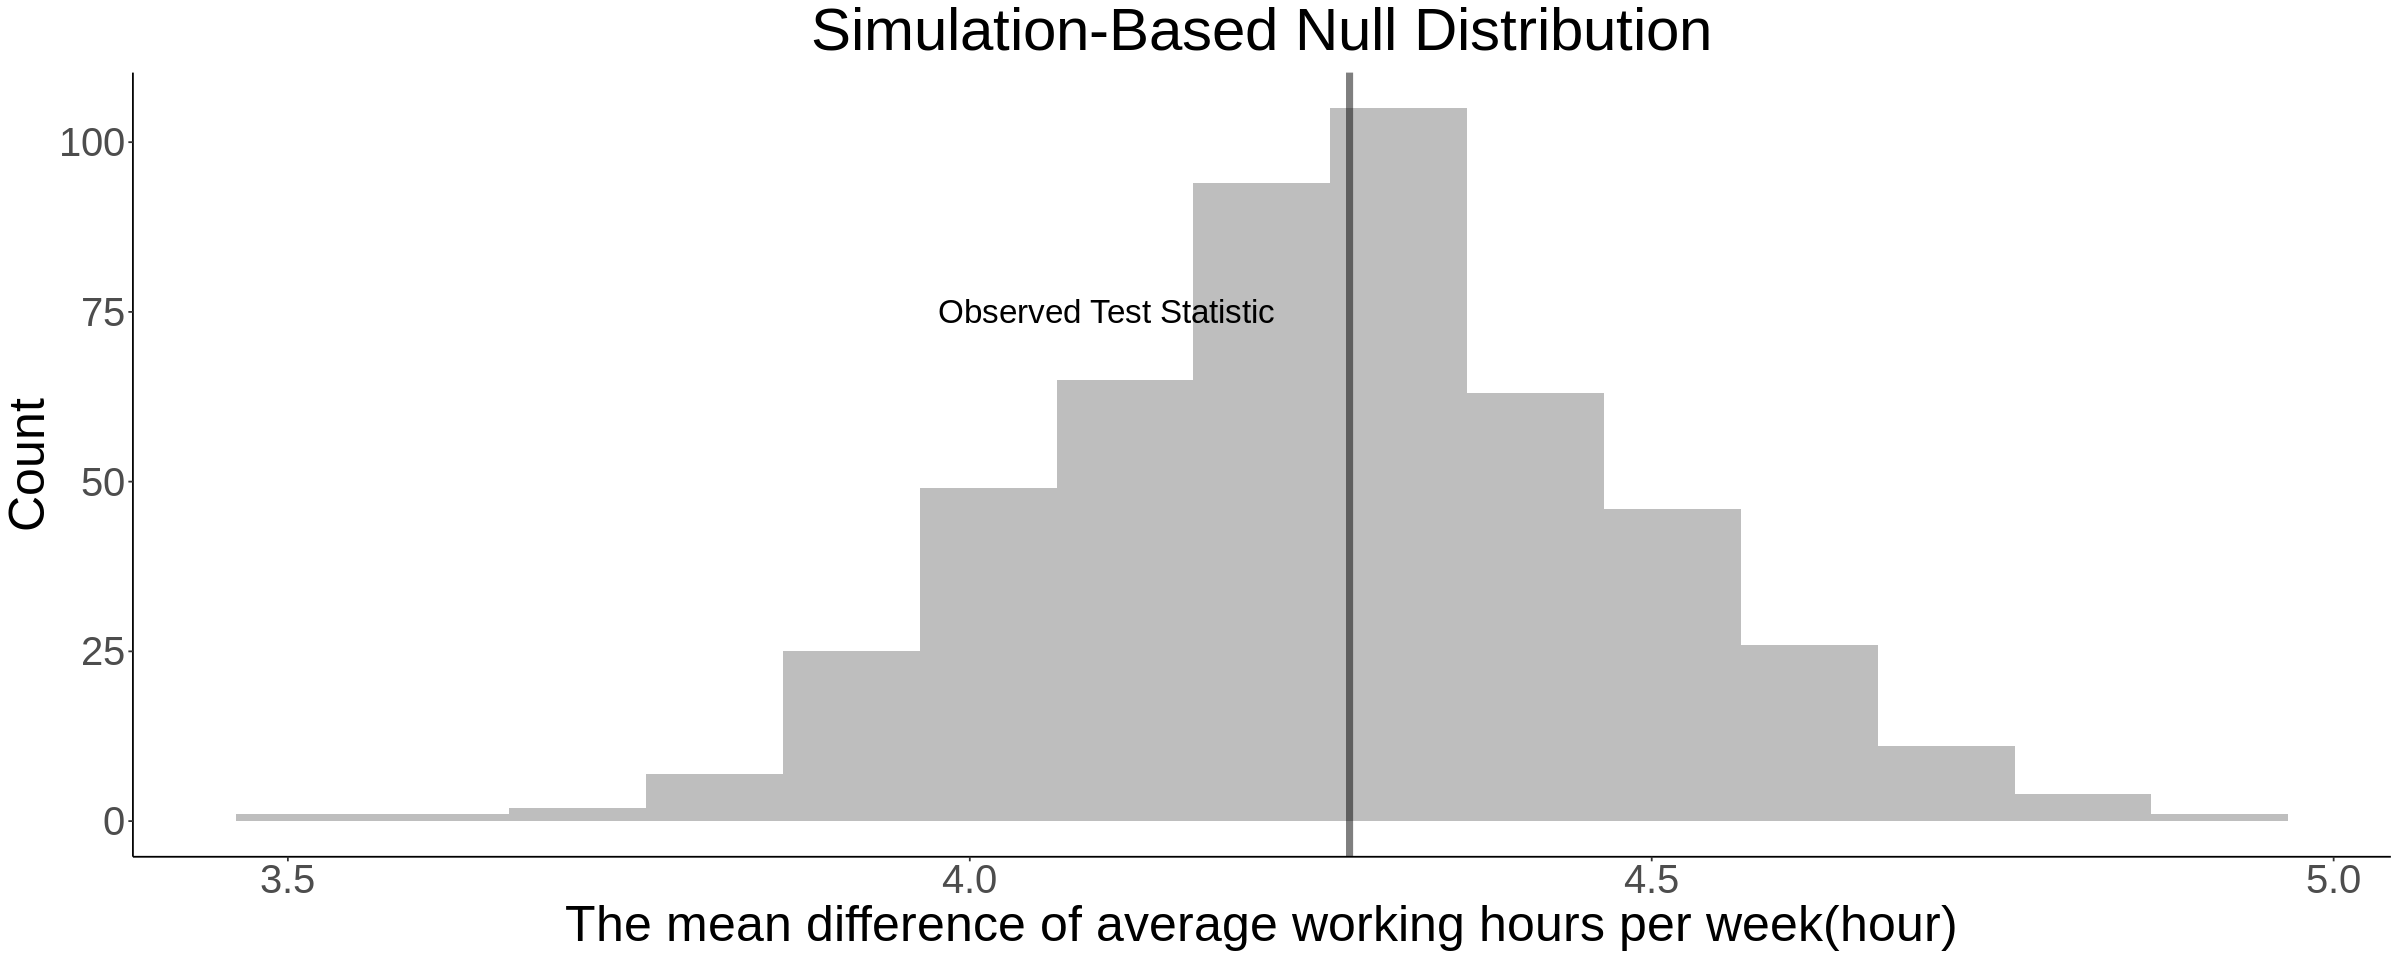

In [32]:
set.seed(50)
bootstrapping_sample <- education_hour_table |> 
    rep_sample_n(size=32561, reps= 500, replace=TRUE) |>
    group_by(replicate,education) |>
    summarize(mean=mean(hours_per_week)) |>
    group_by(replicate) |>
    mutate(stat = mean-lag(mean)) |>
    select(replicate,stat) |>
    filter(!is.na(stat))
observed_statistic <- education_hour_table |> 
    specify(hours_per_week ~ education) |> 
    calculate(stat = "diff in means", order = c("More-than-HS","Less-than-HS")) |>
    pull()

null_model_plot <-bootstrapping_sample |>
    ggplot(aes(x=stat))+
    geom_histogram(bins = 15, fill="grey")+
    geom_vline(xintercept = observed_statistic, color = "black", alpha=.5, lwd=2)+
    annotate("text", x = 4.1, y = 75, label = "Observed Test Statistic", color="Black", size=7)+
    plot_config +
    labs(x = "The mean difference of average working hours per week(hour)", y = "Count") +
    theme(text = element_text(size=30))+
    ggtitle("Simulation-Based Null Distribution")
null_model_plot


**P-Value**

In [33]:
p_value <- mean(bootstrapping_sample$stat > observed_statistic)
p_value

[1] 0.48

## References

Kohavi, R., &amp; Becker, B. (1996, May 1). Adult Data Set. Retrieved 2021, from https://archive.ics.uci.edu/ml/datasets/adult. This database was found with assistance of:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Kim, H., Suh, B. S., Lee, W. C., Jeong, H. S., Son, K. H., Nam, M. W., & Kim, H. C. (2019). The association between long working hours and marital status change: middle-aged and educated Korean in 2014-2015. Annals of occupational and environmental medicine, 31, e3. https://doi.org/10.35371/aoem.2019.31.e3

Kim, Hyunil MD; Lee, Woncheol MD; Lee, Yesung MD Association of Long Working Hours With Marital Status Changes in South Korea, Journal of Occupational and Environmental Medicine: October 2021 - Volume 63 - Issue 10 - p e689-e693
doi: 10.1097/JOM.0000000000002338

## Appendix A

This dataset differentes between the highest highschool, middleschool or elementary grade a person has completed or preschool. We will be grouping those observations into one education category called "Less-than-HS".

Below is a table showing the different labels in the education category. You can see that the data collector has differentiated between the various highschool grades, as well as preschool

In [30]:
raw %>%
    select(education) %>%
    group_by(education) %>%
    summarise(n = n())

education,n
<chr>,<int>
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


### Appendix B

We did not show the confidence interval visually on the graphs for our asymptotic method because it would make the graph to cluttered